<a href="https://colab.research.google.com/github/aparnamohankumar18/hotel_booking/blob/main/hotel_booking_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
# Libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import imblearn
import sys
from datetime import datetime

In [3]:
# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline


In [4]:
# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## Load source dataset

In [5]:
url = 'https://raw.githubusercontent.com/aparnamohankumar18/hotel_booking/main/hotel_bookings_raw.csv'
hotelBook = pd.read_csv(url)

In [6]:
hotelBook.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [7]:
hotelBook.shape

(119390, 43)

In [8]:
hotelBook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotelBook.isnull().sum()

# 4 missing values in children.
# 488 missing values in country.
# 16340 null values in agent.
# 181 null values in CPI_AVG, INFLATION, INFLATION_CHG, CSMR_SENT, UNRATE, INTRSRT, GDP, FUEL_PRCS, CPI_HOTELS, US_GINI, DIS_INC.

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [10]:
hotelBook.drop(columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'reservation_status_date'], inplace=True)

In [11]:
# Converting object to categories.

hotelBook["hotel"] = hotelBook["hotel"].astype("category")
hotelBook["is_canceled"] = hotelBook["is_canceled"].astype("bool")
hotelBook["babies"] = hotelBook["babies"].astype("category")
hotelBook["meal"] = hotelBook["meal"].astype("category")
hotelBook["market_segment"] = hotelBook["market_segment"].astype("category")
hotelBook["distribution_channel"] = hotelBook["distribution_channel"].astype("category")
hotelBook["is_repeated_guest"] = hotelBook["is_repeated_guest"].astype("bool")
hotelBook["reserved_room_type"] = hotelBook["reserved_room_type"].astype("category")
hotelBook["assigned_room_type"] = hotelBook["assigned_room_type"].astype("category")
hotelBook["deposit_type"] = hotelBook["deposit_type"].astype("category")
hotelBook["customer_type"] = hotelBook["customer_type"].astype("category")
hotelBook["reservation_status"] = hotelBook["reservation_status"].astype("category")
hotelBook["INFLATION_CHG"] = hotelBook["INFLATION_CHG"].astype("category")
hotelBook["INTRSRT"] = hotelBook["INTRSRT"].astype("category")
hotelBook["US_GINI"] = hotelBook["US_GINI"].astype("category")

In [12]:
hotelBook['children'] = hotelBook['children'].fillna(value = 0) # Missing value replaced by mode = 0, in children.
hotelBook["children"] = hotelBook["children"].astype("int")

In [13]:
index_i = hotelBook[ hotelBook['MO_YR'] == '11-2014'].index
hotelBook.drop( index_i, inplace = True)

# Only one data record for this date and MO_YR hence can be considered an outlier data point and removed. Record with null value will be removed.

In [14]:
index_j = hotelBook[ hotelBook['MO_YR'] == '10-2014'].index
hotelBook.drop( index_j, inplace = True)

# These records lie at the beginning of the dateline of the dataset hence we cannot extrapolate these values, we have to drop these data records.

In [15]:
hotelBook.drop('MO_YR', axis = 1, inplace = True)
#Drop column: MO_YR.

## Imbalanced Target Variable

In [16]:
hotelBook['is_canceled'].value_counts()

False    75166
True     44043
Name: is_canceled, dtype: int64

<Axes: ylabel='is_canceled'>

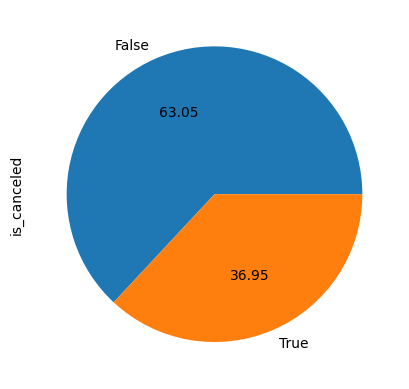

In [17]:
# Let's show this with pie chart first approach
hotelBook['is_canceled'].value_counts().plot.pie(autopct='%.2f')

###Split data into train and test data

---

In [18]:
# Separate the independent attributes i.e. every column except is_canceled variable

# Store the target column (is_canceled) into Y array
X = hotelBook.loc[:, hotelBook.columns != 'is_canceled']  # Independent variables
y = hotelBook.loc[:, hotelBook.columns == 'is_canceled']  # Target variable

# Splitting data into training and test set, stratified by target variable distribution.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)


(83446, 35) (35763, 35)


###Imputing Missing Values

---

In [19]:
imputer = KNNImputer(n_neighbors=5)
reqd_col_for_impute = ['agent']

In [20]:
# Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [21]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
CPI_AVG                           0
INFLATION                         0
INFLATION_CHG                     0
CSMR_SENT                   

In [22]:
X_train.nunique()
# hotel, is_canceled, children, babies, meal, market_segment, distribution channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, customer_type, required_car_parking_spaces, total_of_special_requests, reservation_status, INFLATION_CHG, INTRSRT, US_GINI are categorical.(Taking <6 values)
# lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking changes, agent, days_in_waiting_list, adr, reservation_status_date, CPI_AVG, INFLATION, CSMR_SENT, UNRATE, GDP, FUEL_PRCS, CPI_HOTELS, DIS_INC are numeric.(int or float)

hotel                                2
lead_time                          472
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              10
children                             5
babies                               4
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              14
previous_bookings_not_canceled      62
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     20
deposit_type                         3
agent                              317
days_in_waiting_list               123
customer_type                        4
adr                               7486
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status                   3
CPI_AVG                             33
INFLATION                

In [23]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

City Hotel      55509
Resort Hotel    27937
Name: hotel, dtype: int64
******************************
0     82810
1       626
2         9
10        1
9         0
Name: babies, dtype: int64
******************************
BB           64394
HB           10141
SC            7524
Undefined      827
FB             560
Name: meal, dtype: int64
******************************
Online TA        39675
Offline TA/TO    17056
Groups           13610
Direct            8775
Corporate         3664
Complementary      497
Aviation           168
Undefined            1
Name: market_segment, dtype: int64
******************************
TA/TO        68515
Direct       10163
Corporate     4618
GDS            147
Undefined        3
Name: distribution_channel, dtype: int64
******************************
A    60010
D    13446
E     4620
F     2031
G     1458
B      782
C      655
H      427
P       12
L        5
Name: reserved_room_type, dtype: int64
******************************
A    51683
D    17701
E     5510


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83446 entries, 11092 to 14853
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           83446 non-null  category
 1   lead_time                       83446 non-null  int64   
 2   stays_in_weekend_nights         83446 non-null  int64   
 3   stays_in_week_nights            83446 non-null  int64   
 4   adults                          83446 non-null  int64   
 5   children                        83446 non-null  int64   
 6   babies                          83446 non-null  category
 7   meal                            83446 non-null  category
 8   market_segment                  83446 non-null  category
 9   distribution_channel            83446 non-null  category
 10  is_repeated_guest               83446 non-null  bool    
 11  previous_cancellations          83446 non-null  int64   
 12  previous_booki

In [25]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,83446.0,103.569782,106.391194,0.000000,18.000000,69.000000,160.000000,737.000000
stays_in_weekend_nights,83446.0,0.932052,1.005091,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,83446.0,2.506052,1.928218,0.000000,1.000000,2.000000,3.000000,50.000000
adults,83446.0,1.856973,0.550238,0.000000,2.000000,2.000000,2.000000,50.000000
children,83446.0,0.105290,0.400924,0.000000,0.000000,0.000000,0.000000,10.000000
previous_cancellations,83446.0,0.084294,0.822471,0.000000,0.000000,0.000000,0.000000,26.000000
previous_bookings_not_canceled,83446.0,0.134662,1.503776,0.000000,0.000000,0.000000,0.000000,72.000000
booking_changes,83446.0,0.220981,0.655047,0.000000,0.000000,0.000000,0.000000,21.000000
agent,83446.0,86.710068,102.820561,1.000000,9.000000,28.000000,153.000000,535.000000
days_in_waiting_list,83446.0,2.294226,17.376776,0.000000,0.000000,0.000000,0.000000,391.000000


In [26]:
X_train.describe(include=['category','bool']).T

,count,unique,top,freq
hotel,83446,2,City Hotel,55509
babies,83446,4,0,82810
meal,83446,5,BB,64394
market_segment,83446,8,Online TA,39675
distribution_channel,83446,5,TA/TO,68515
is_repeated_guest,83446,2,False,80942
reserved_room_type,83446,10,A,60010
assigned_room_type,83446,12,A,51683
deposit_type,83446,3,No Deposit,73211
customer_type,83446,4,Transient,62724


In [27]:
y_train.value_counts()

is_canceled
False          52616
True           30830
dtype: int64

In [28]:
#!{sys.executable} -m pip install -U ydata-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

In [29]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(hotel, title = "Profiling Report")

In [30]:
#profile.to_widgets()

## Univariate Analysis

## Detecting Outliers and handling

In [31]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x = feature, ax=ax_box2, showmeans = True, color = 'violet') # boxplot will be created and a triangle will indicate the mean value of the column
    sns.distplot(x =feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

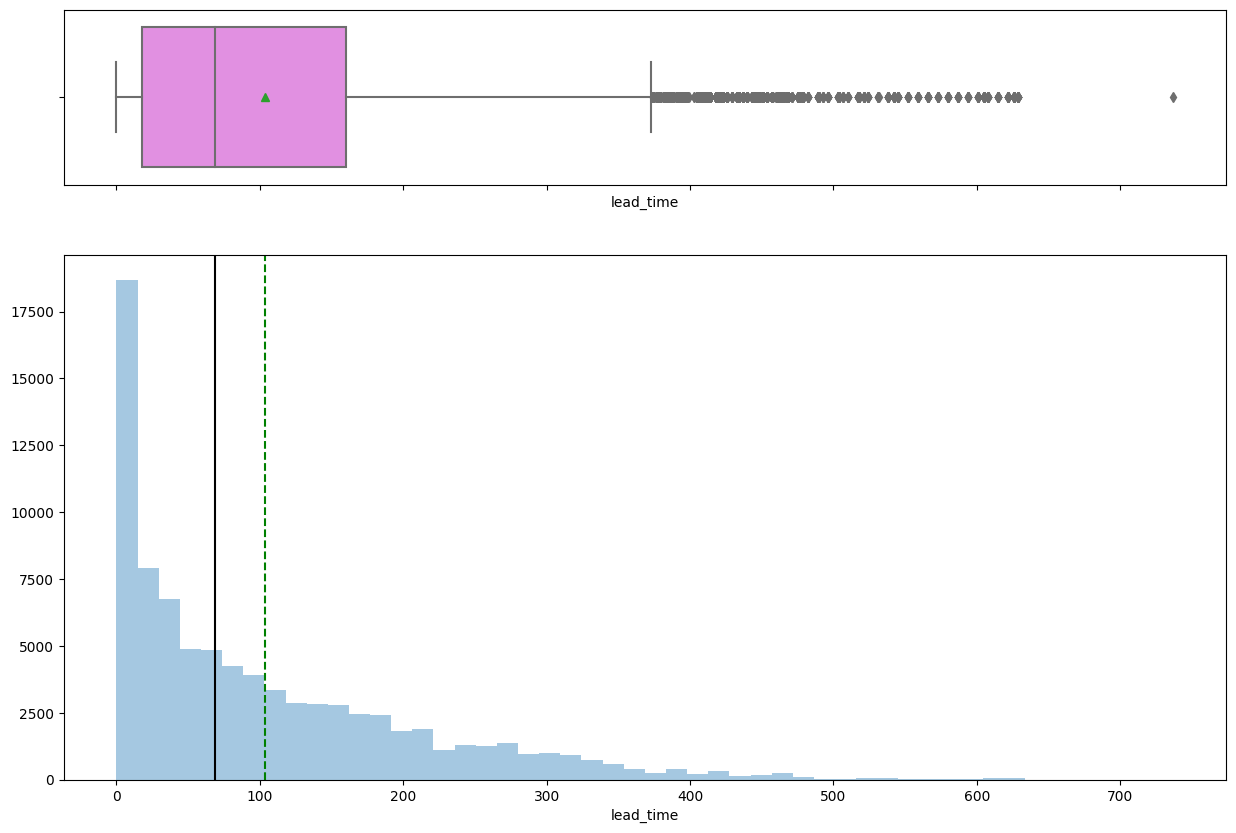

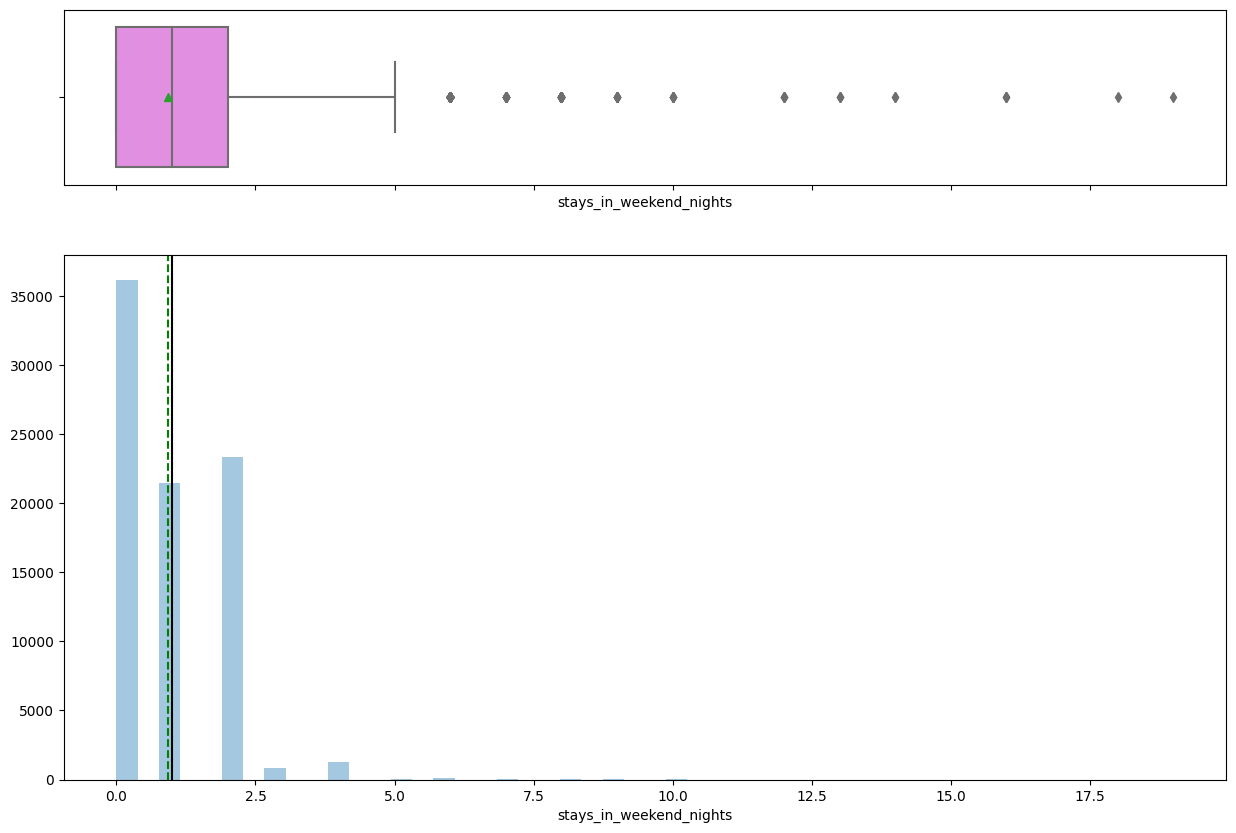

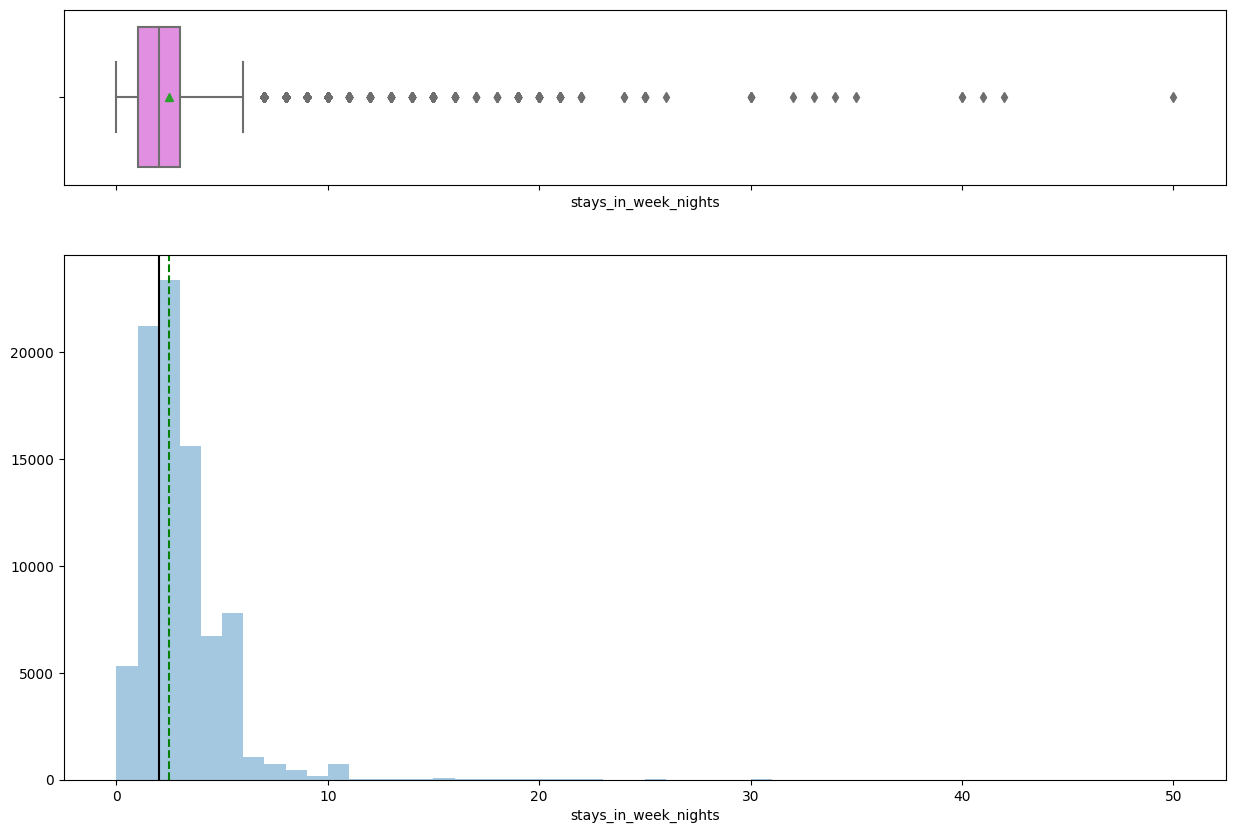

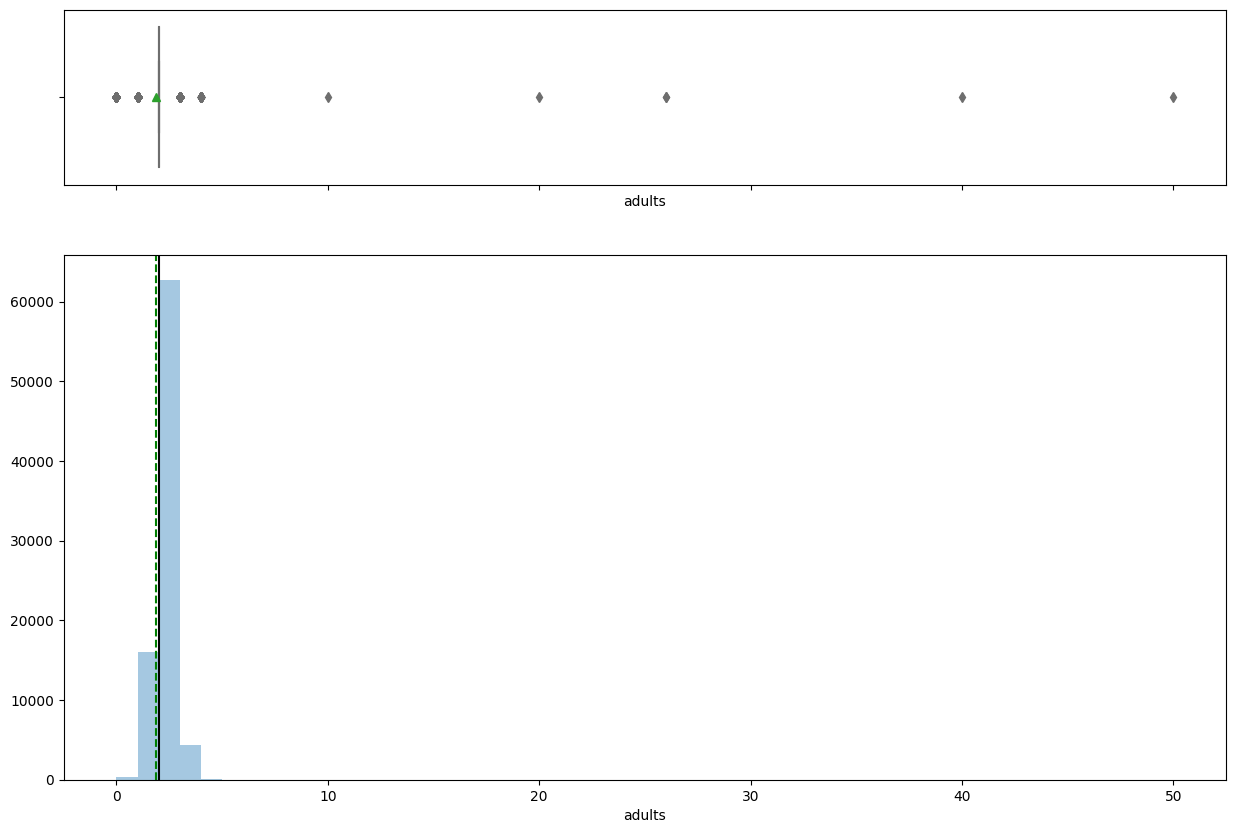

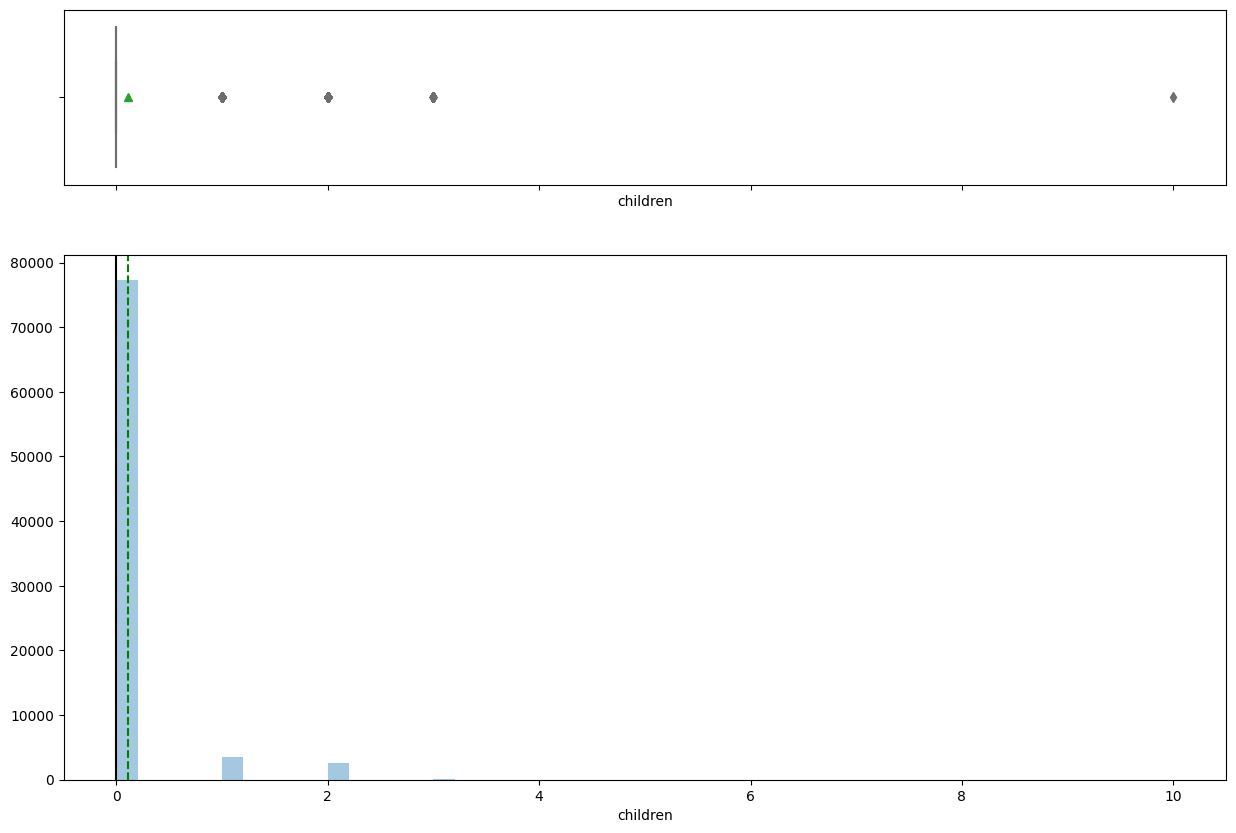

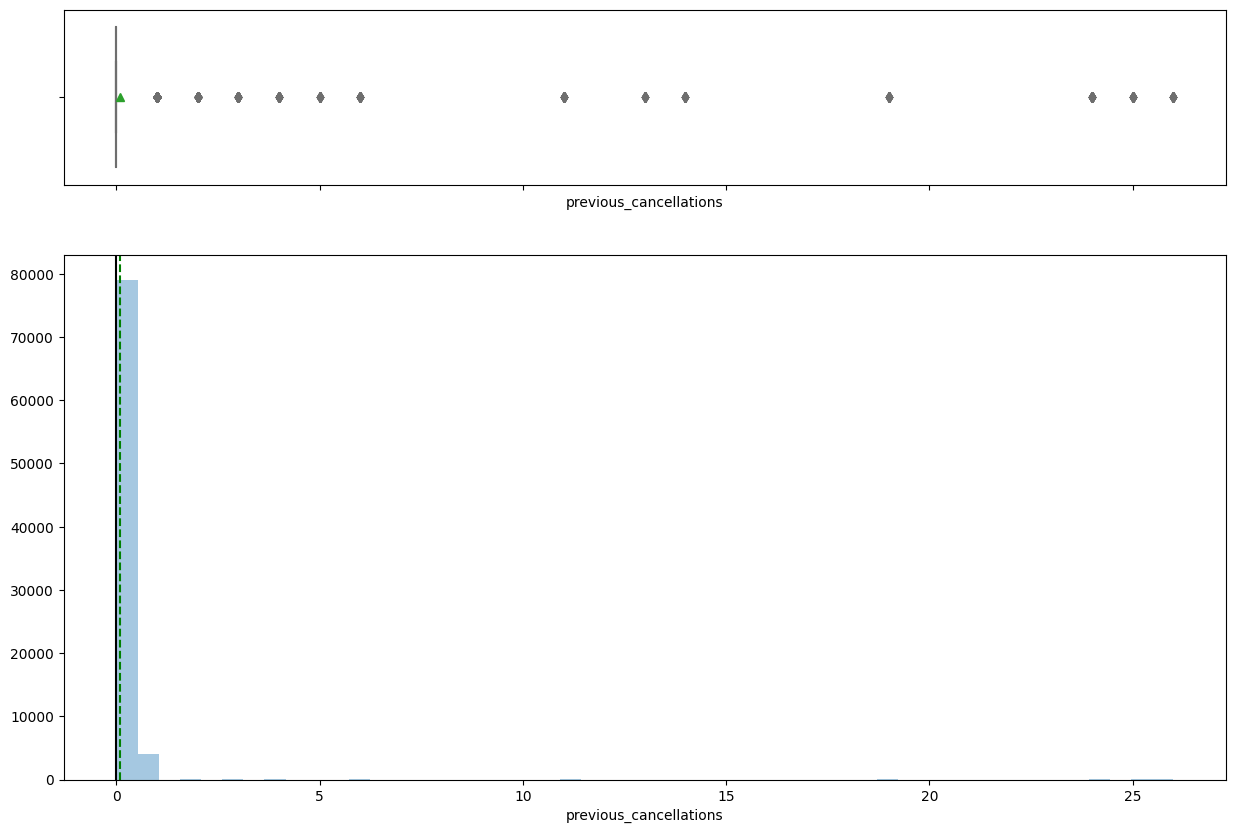

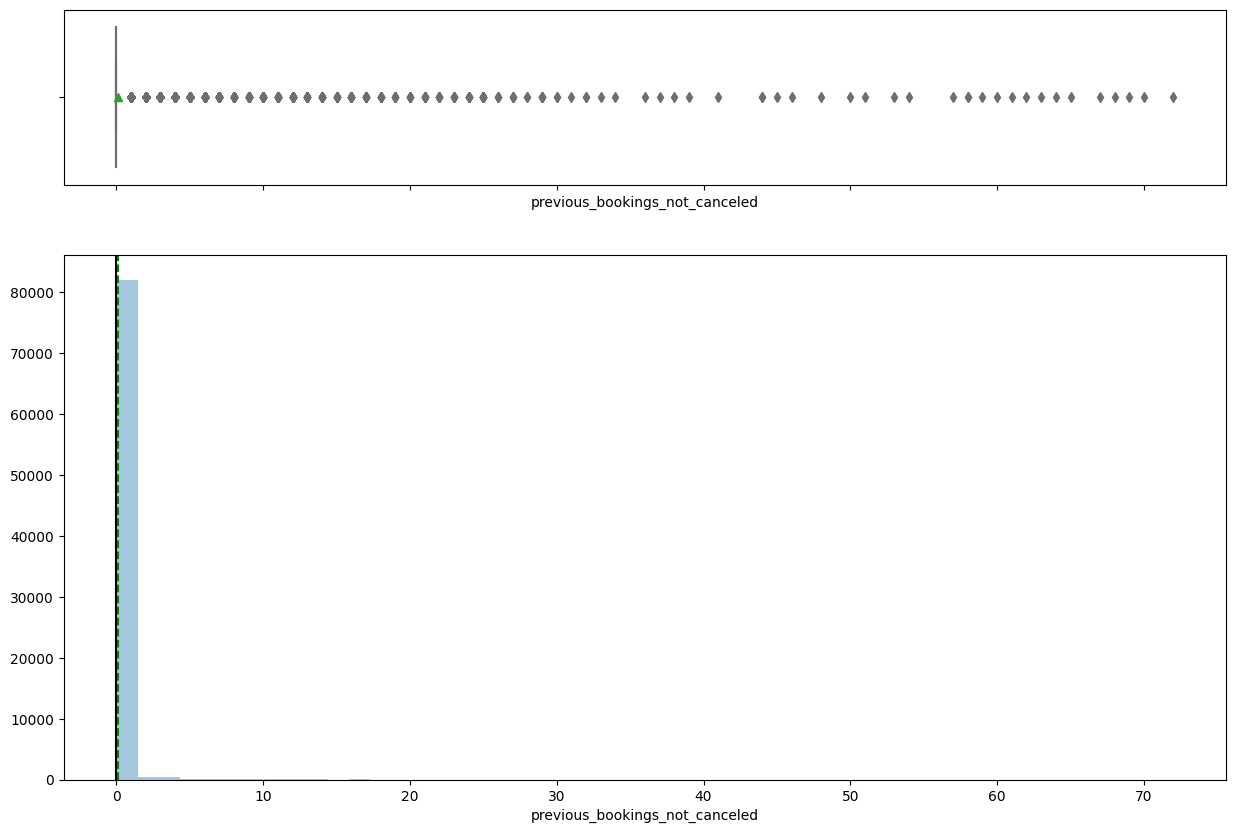

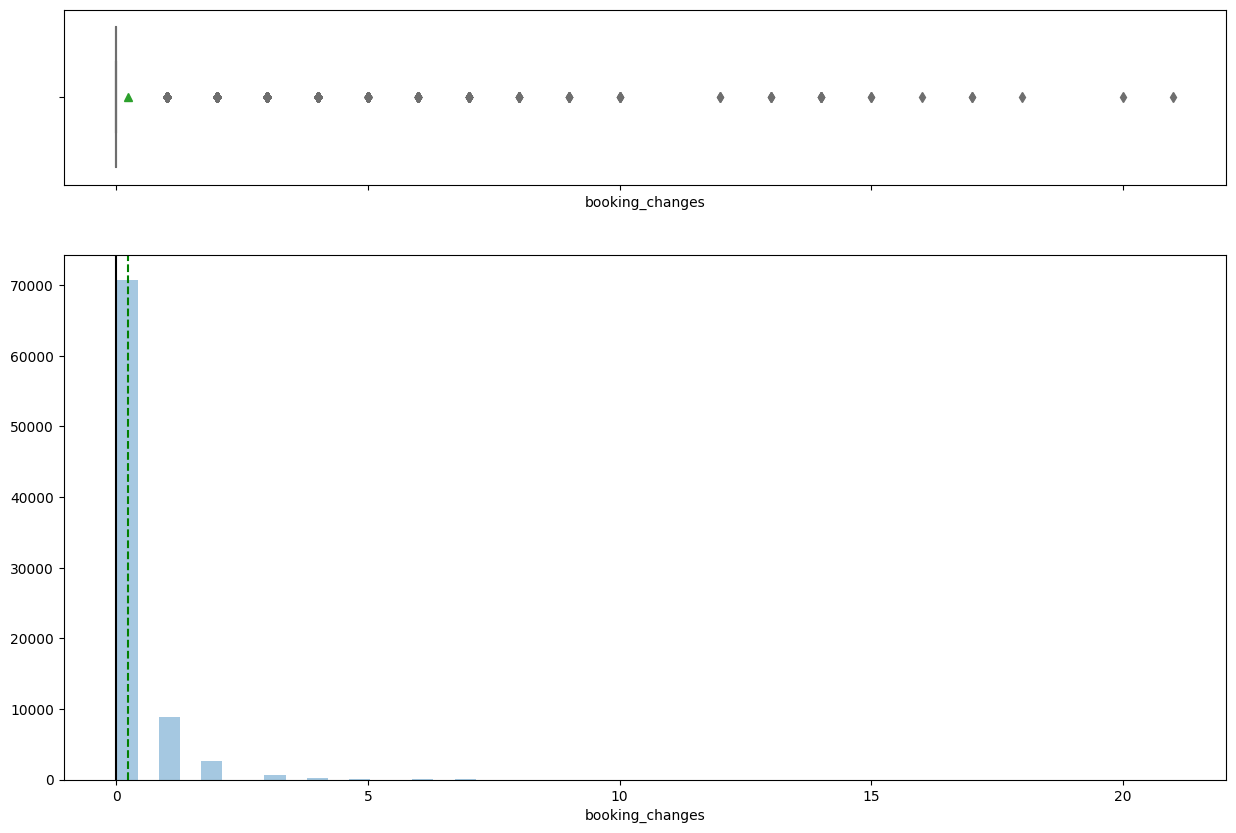

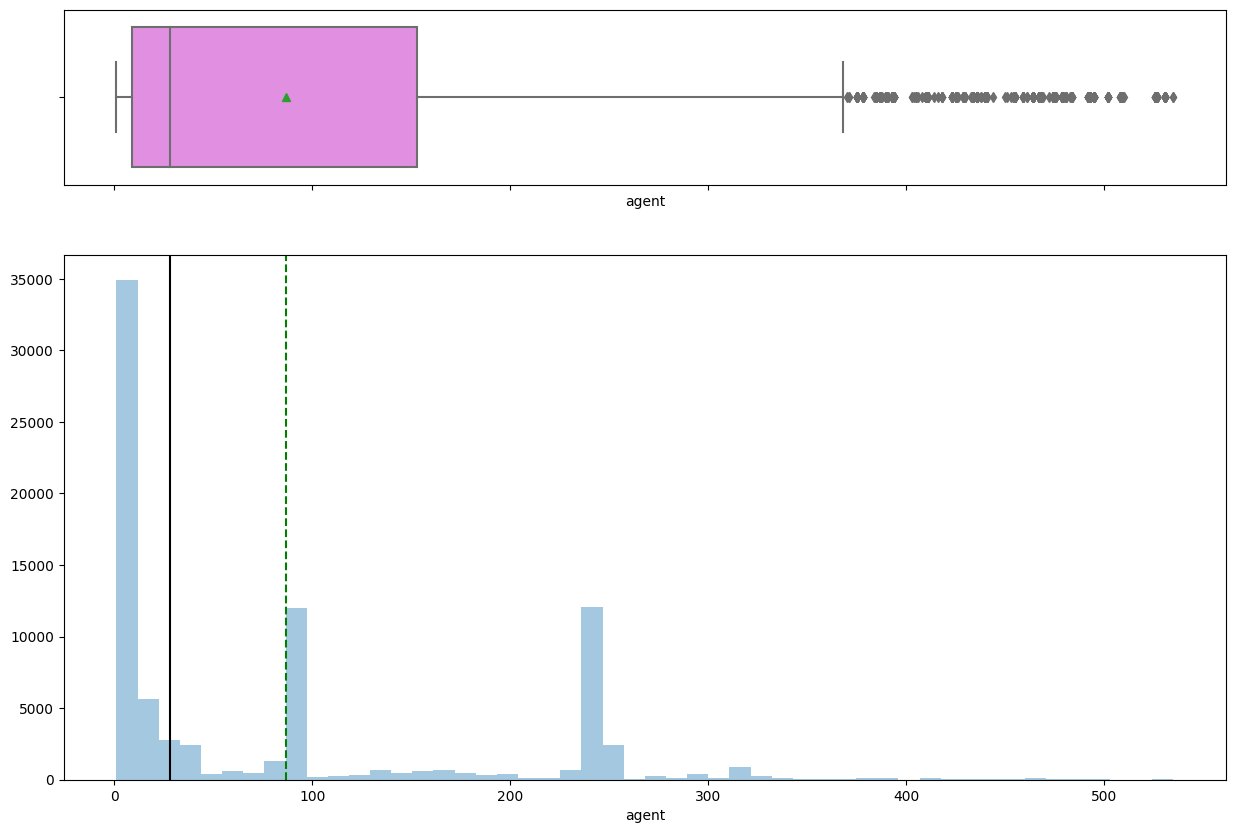

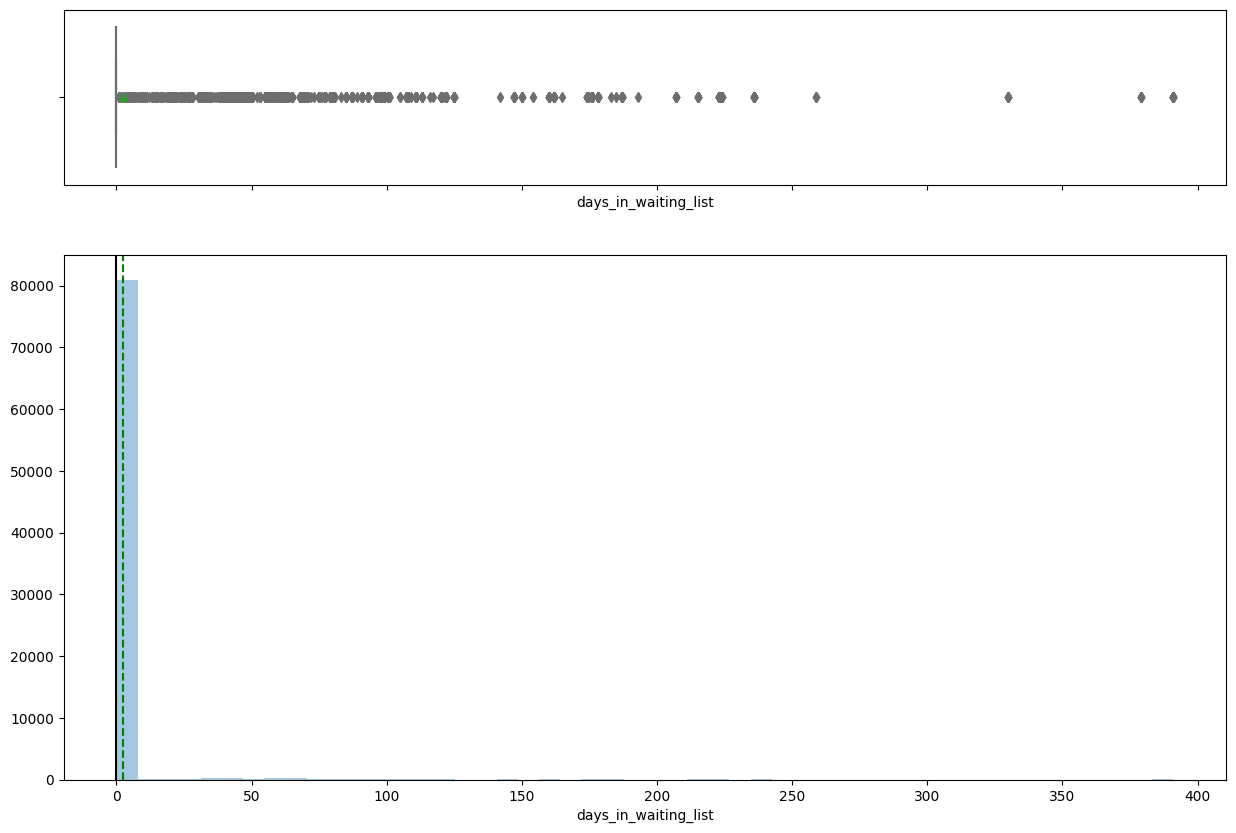

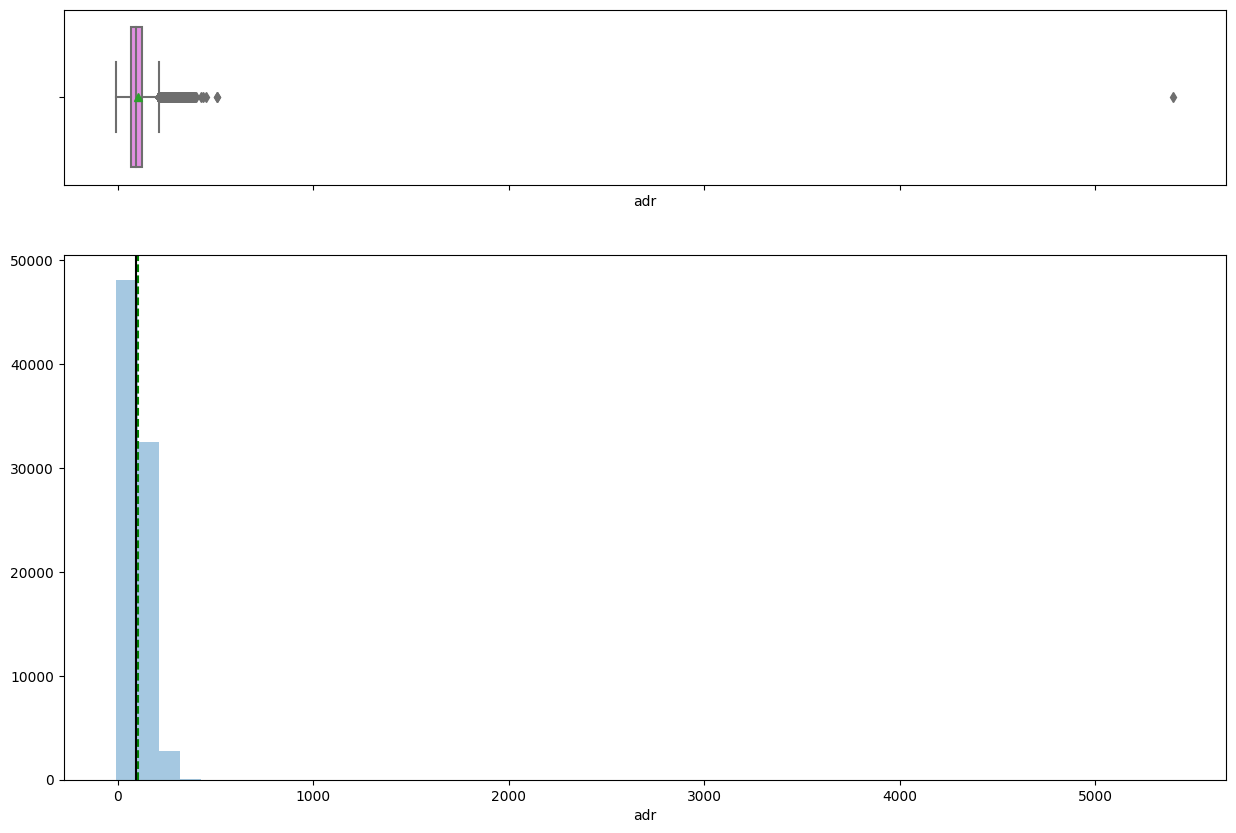

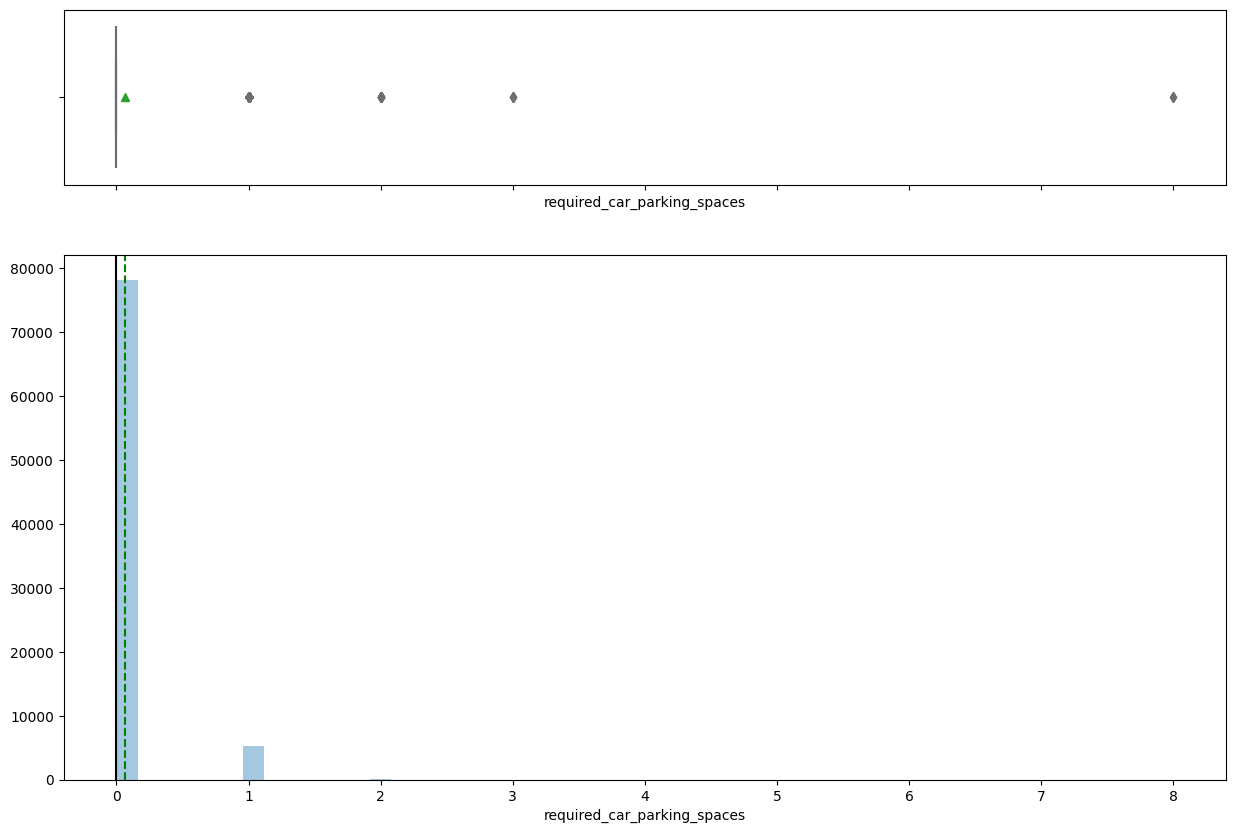

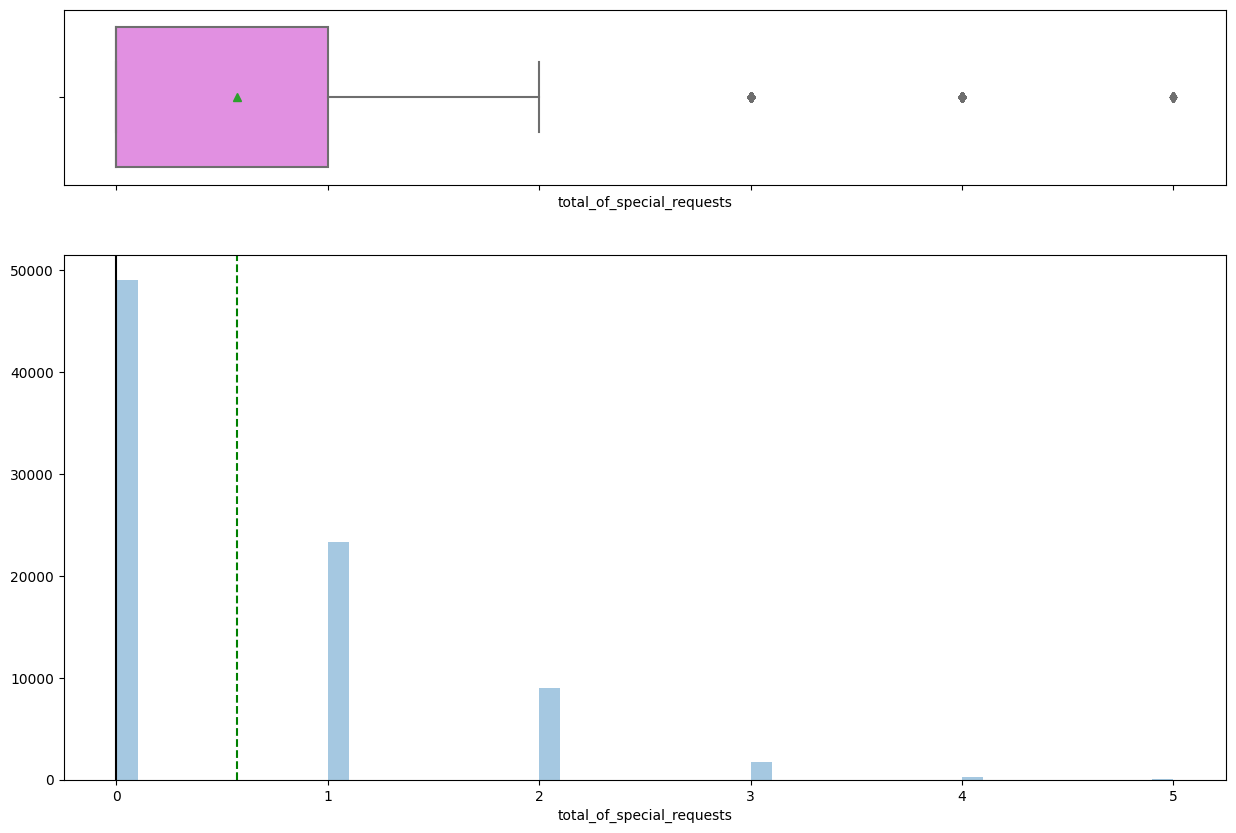

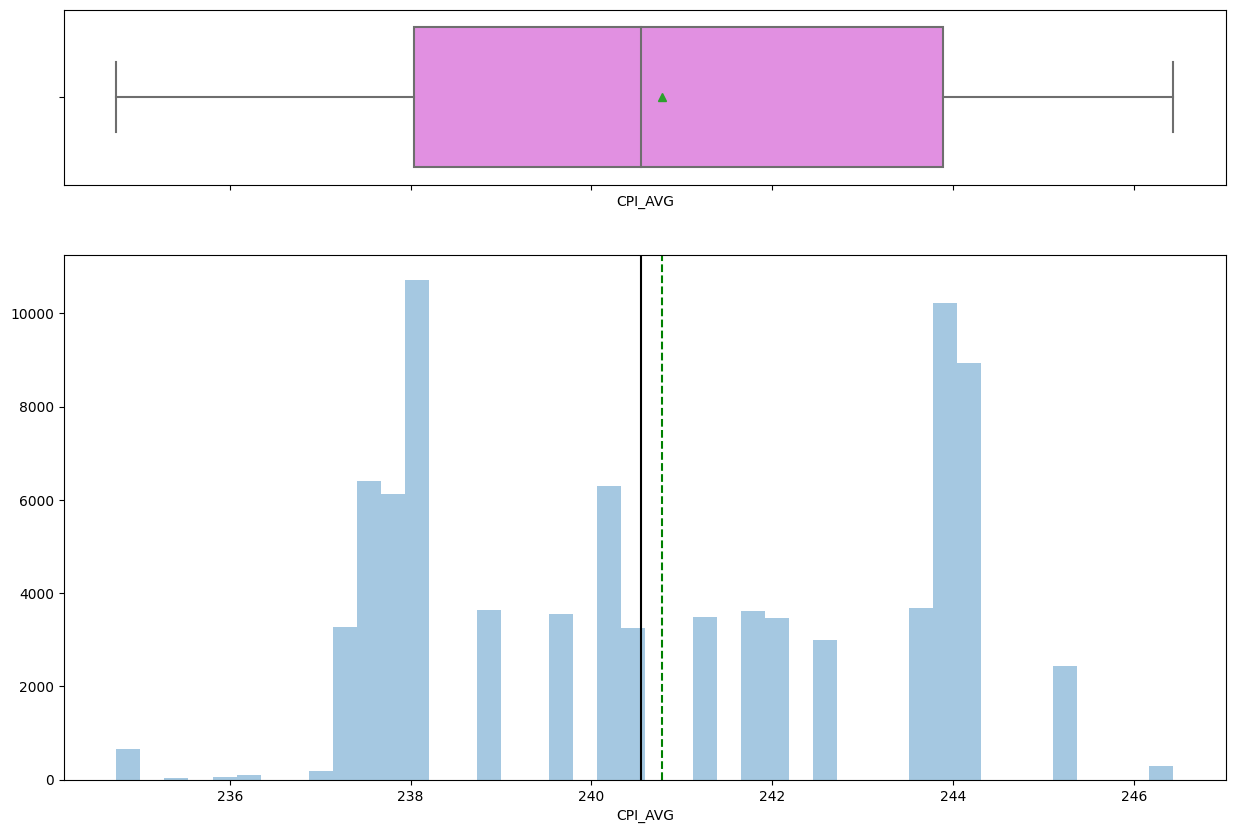

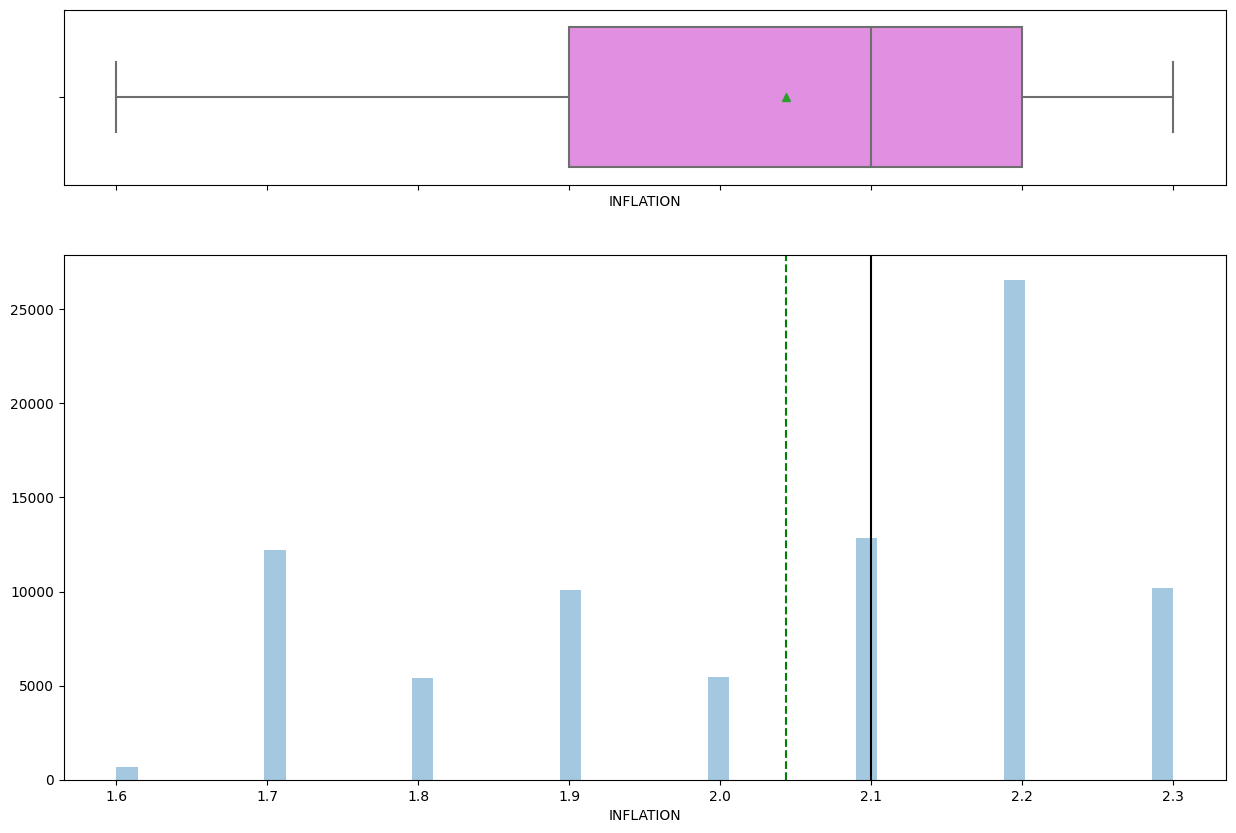

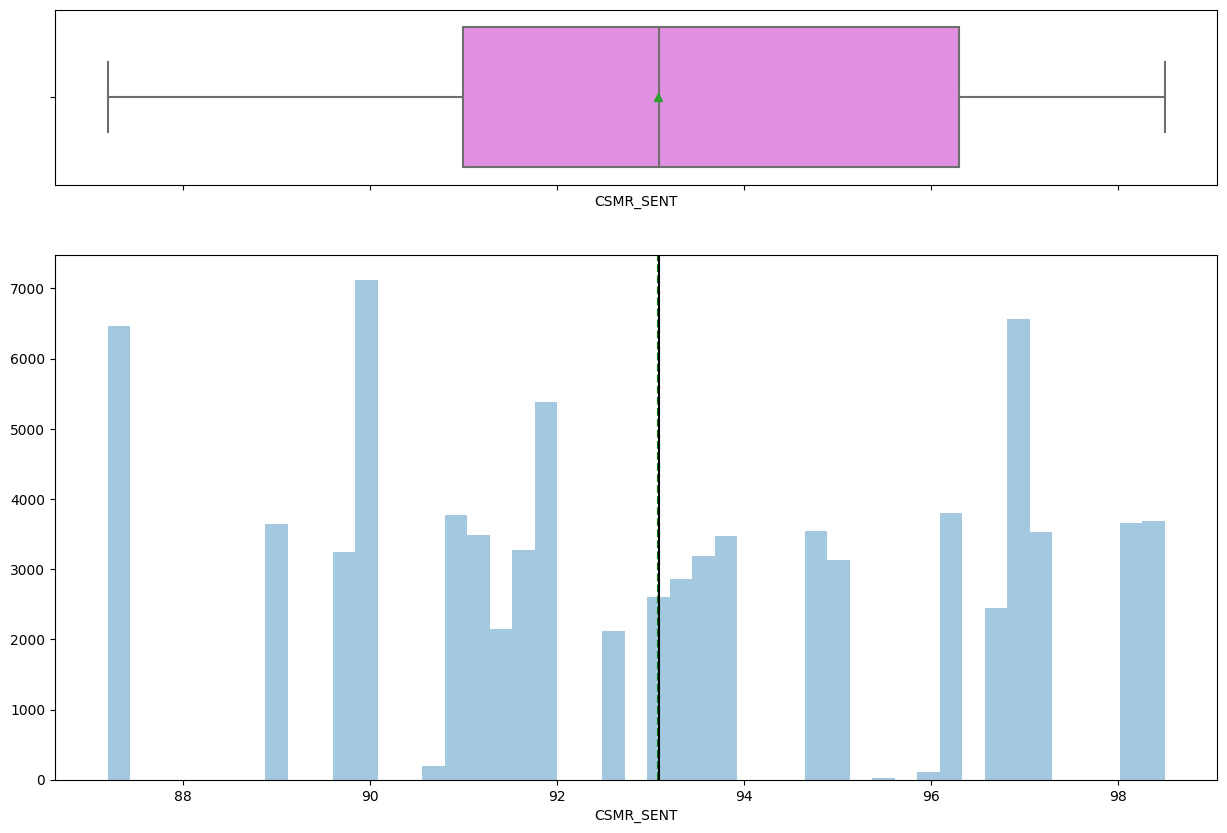

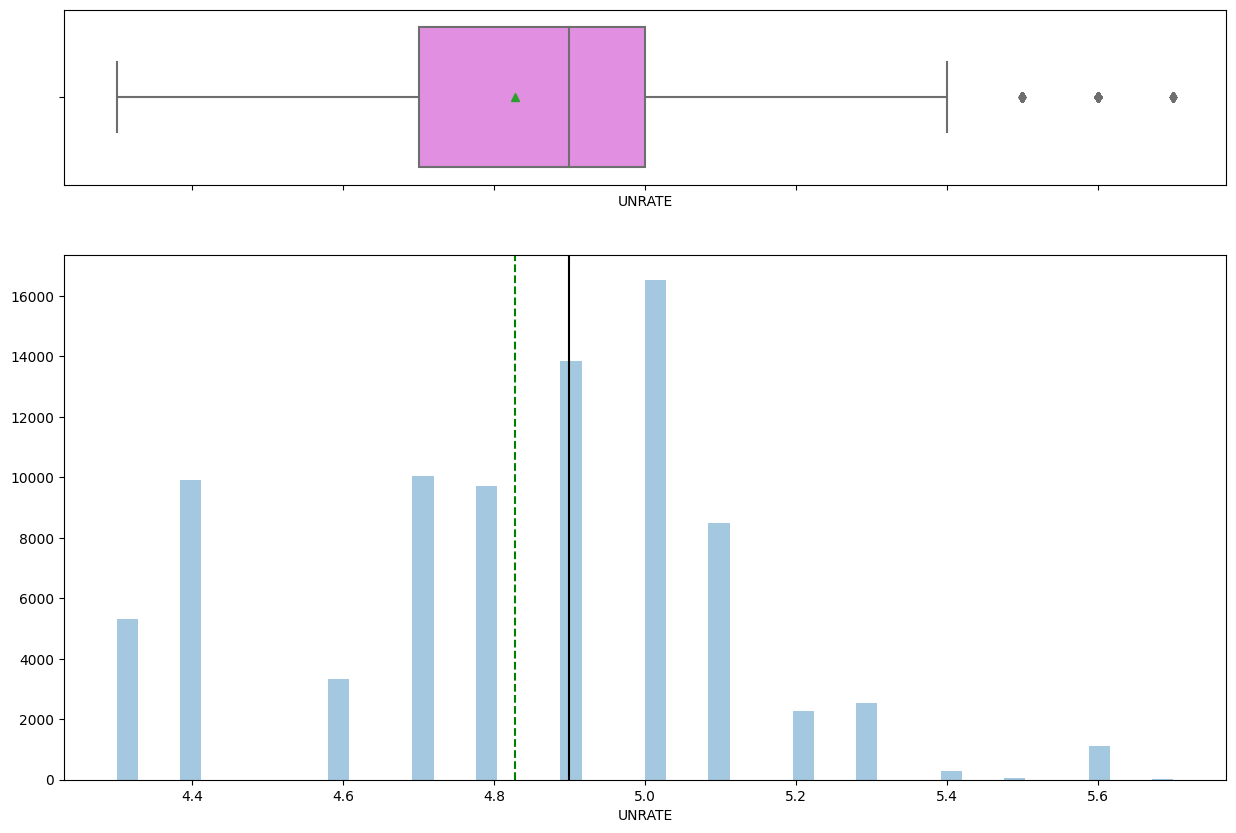

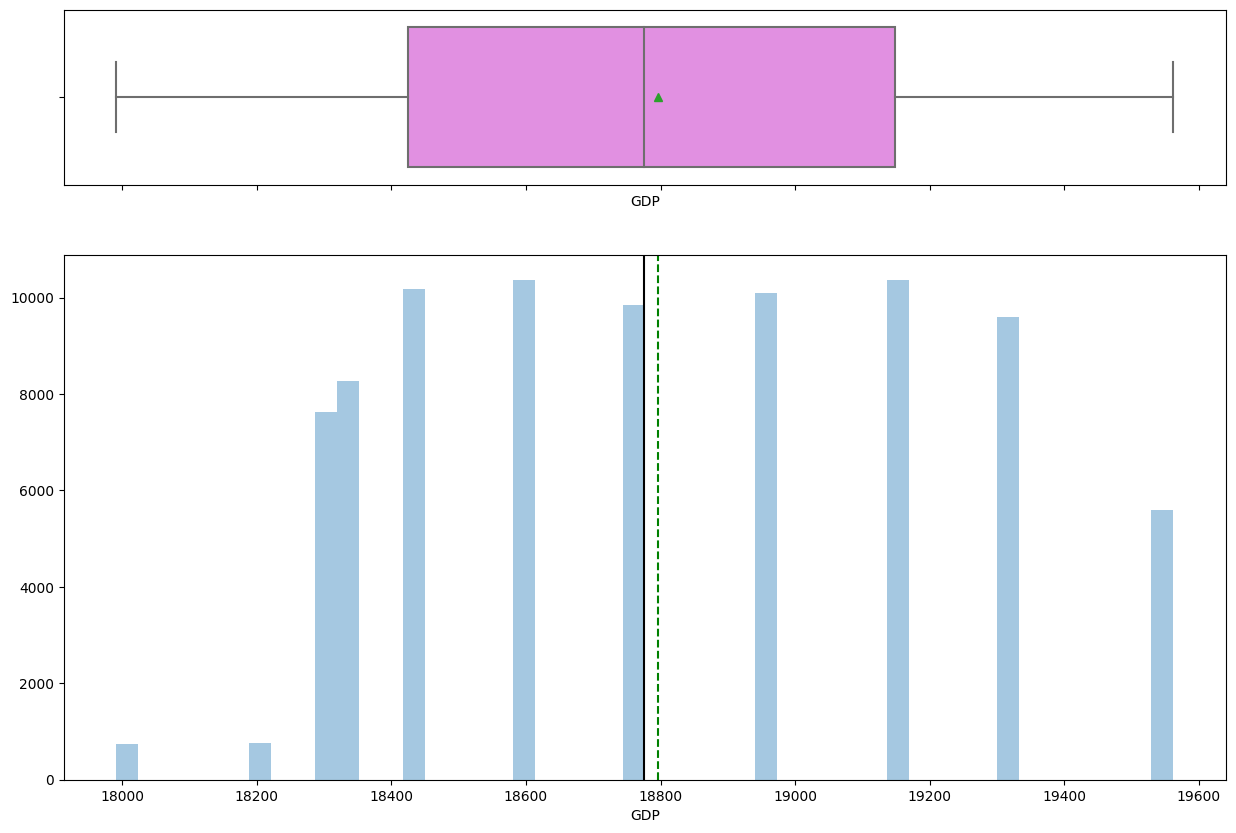

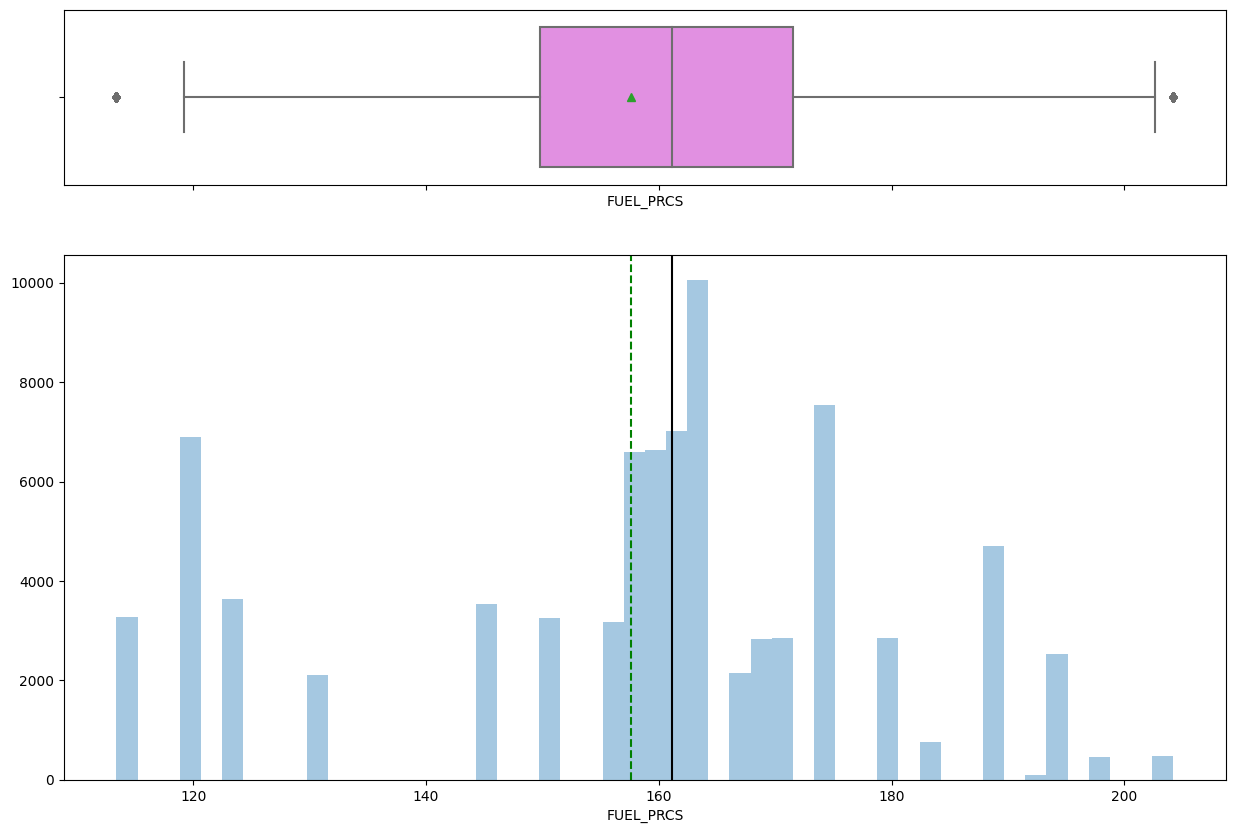

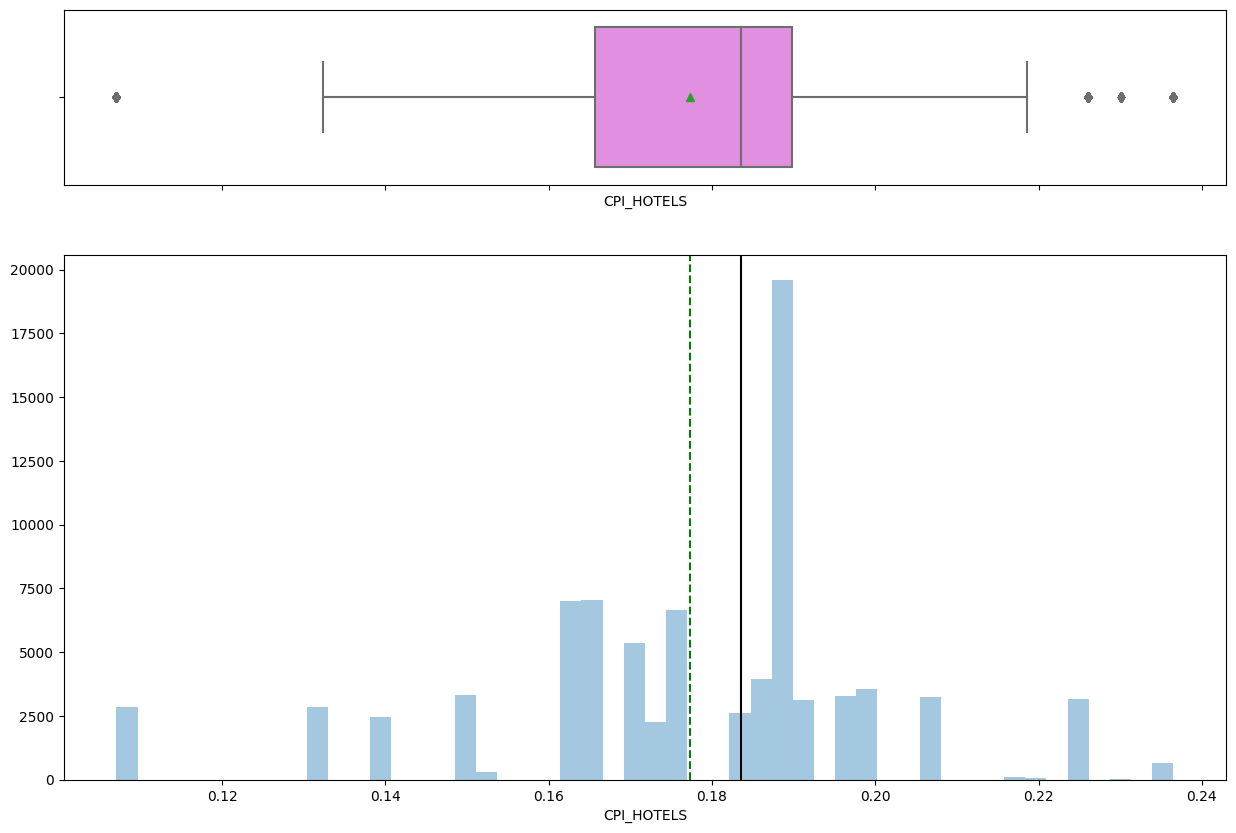

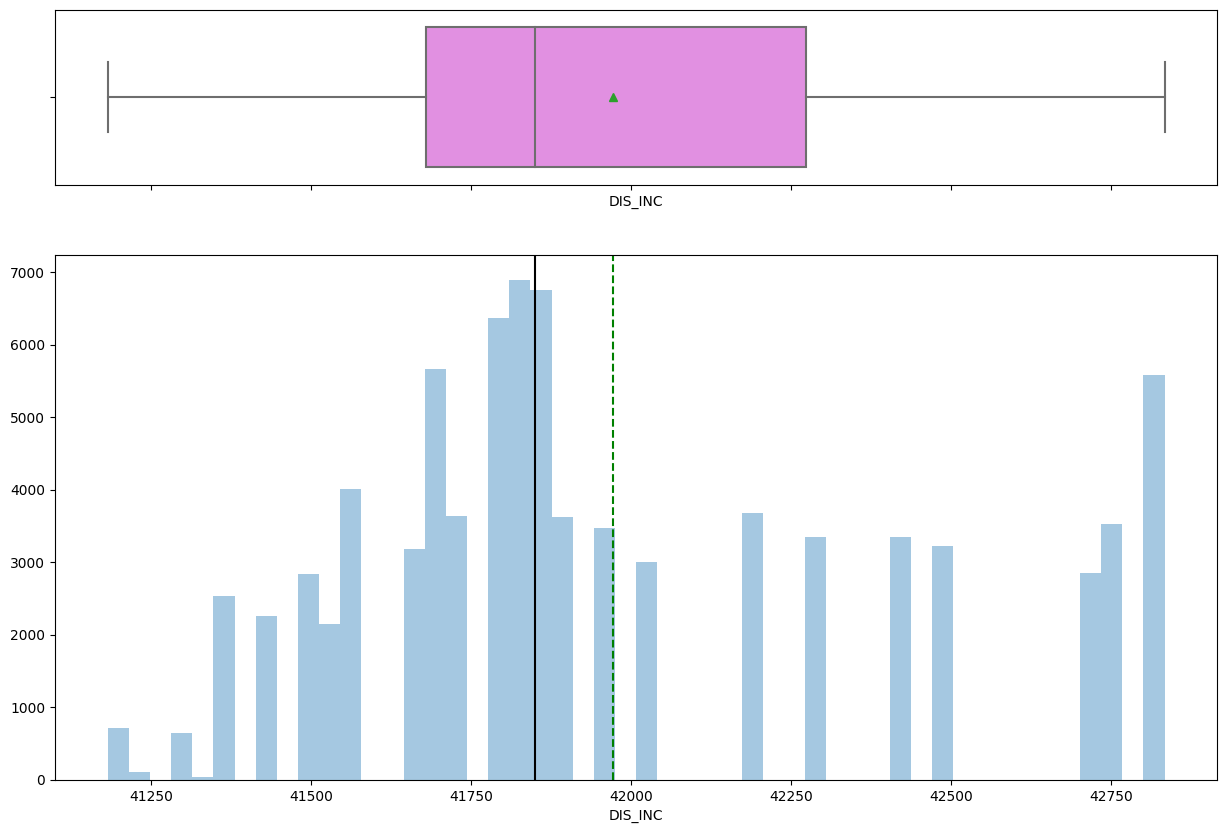

In [32]:
# distplot for continuous columns
for i in ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults', 'children', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','CPI_AVG','INFLATION','CSMR_SENT','UNRATE','GDP','FUEL_PRCS','CPI_HOTELS','DIS_INC']:
    histogram_boxplot(X_train[i])
    plt.show()

In [33]:
for i in ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults', 'children', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','UNRATE','FUEL_PRCS','CPI_HOTELS']:
  upper_limit = X_train[i].quantile(0.99)
  lower_limit = X_train[i].quantile(0.01)
  X_train[i] = np.where(X_train[i] >= upper_limit,
        upper_limit,
        np.where(X_train[i]<= lower_limit,
        lower_limit,
        X_train[i]))

Apply Capping(Winsorization) to deal with outliers,1% capping.

Reduced extent of outliers, although they probably still skew the data.

In [34]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

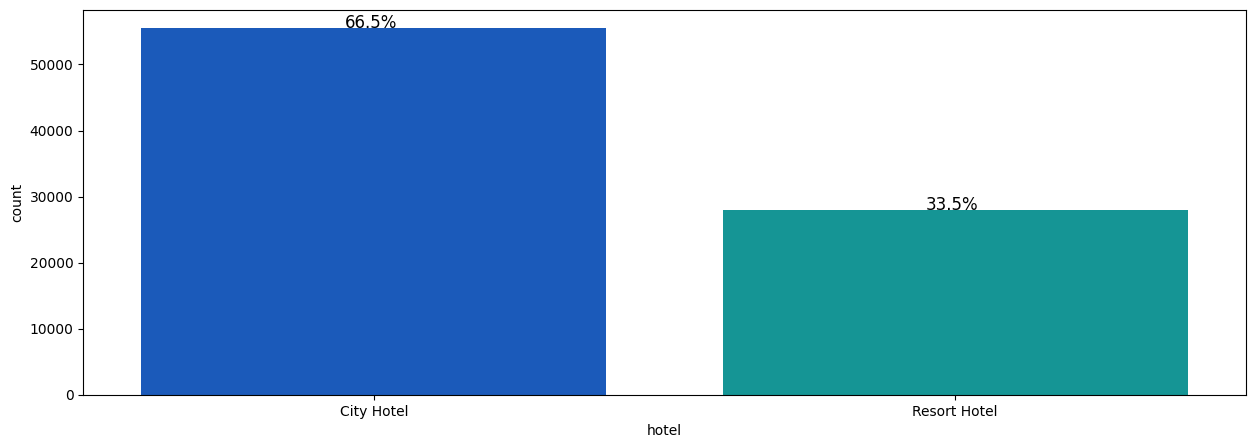

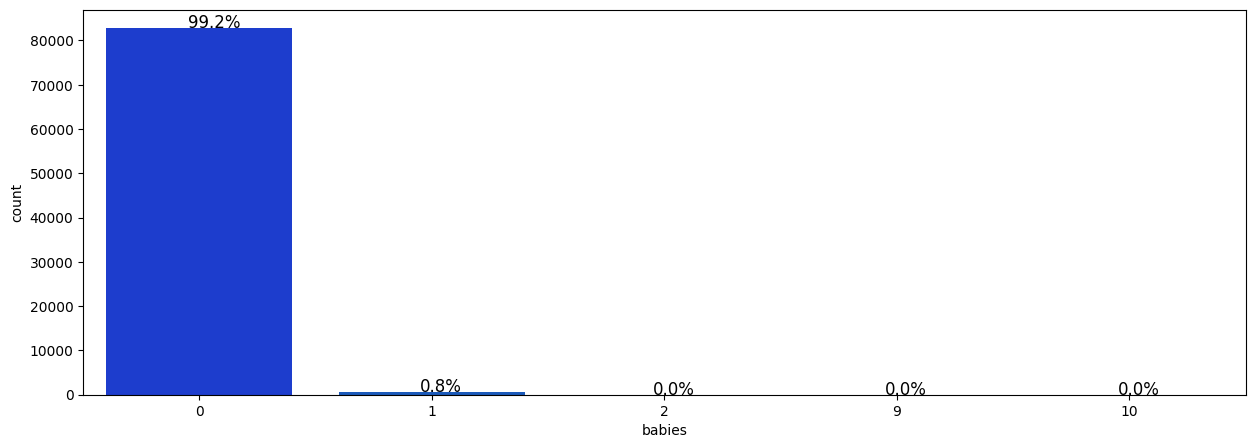

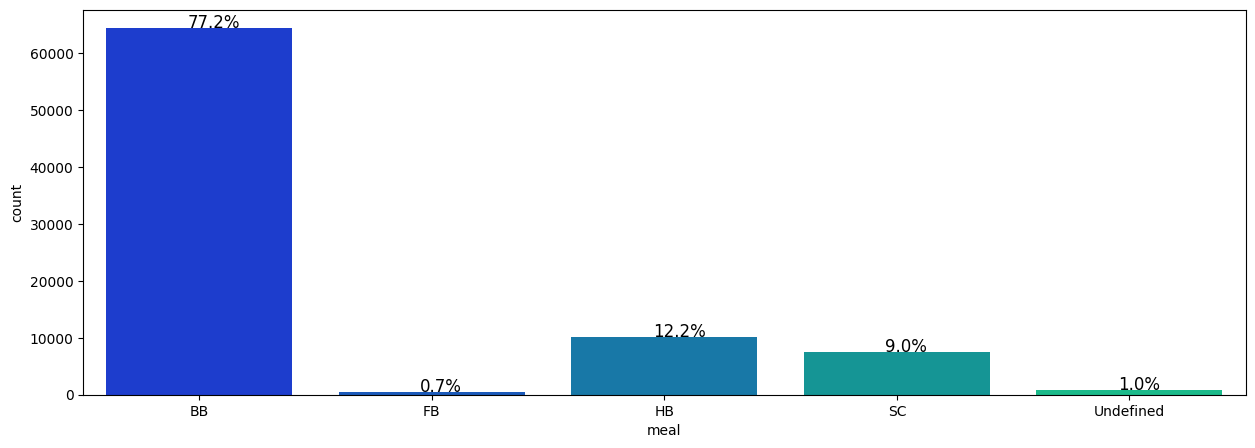

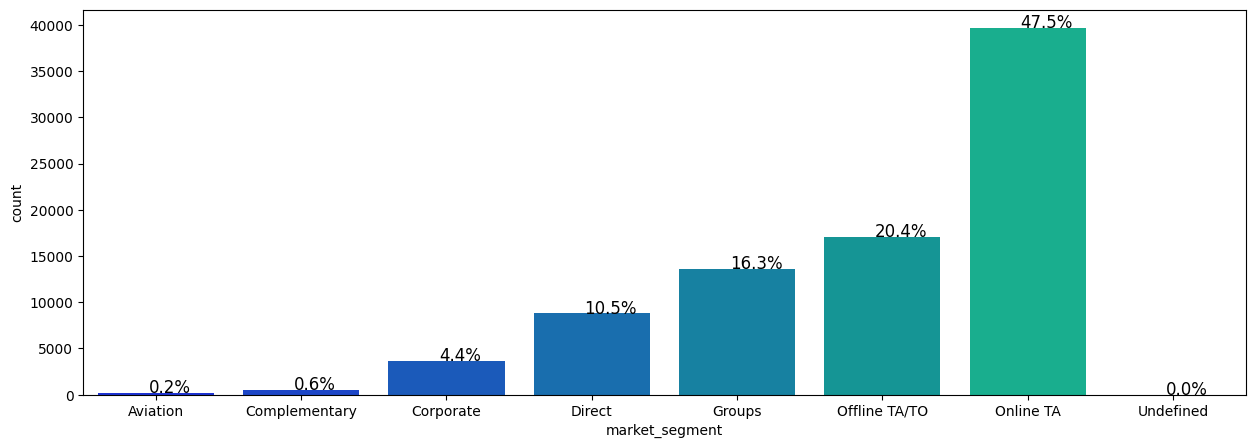

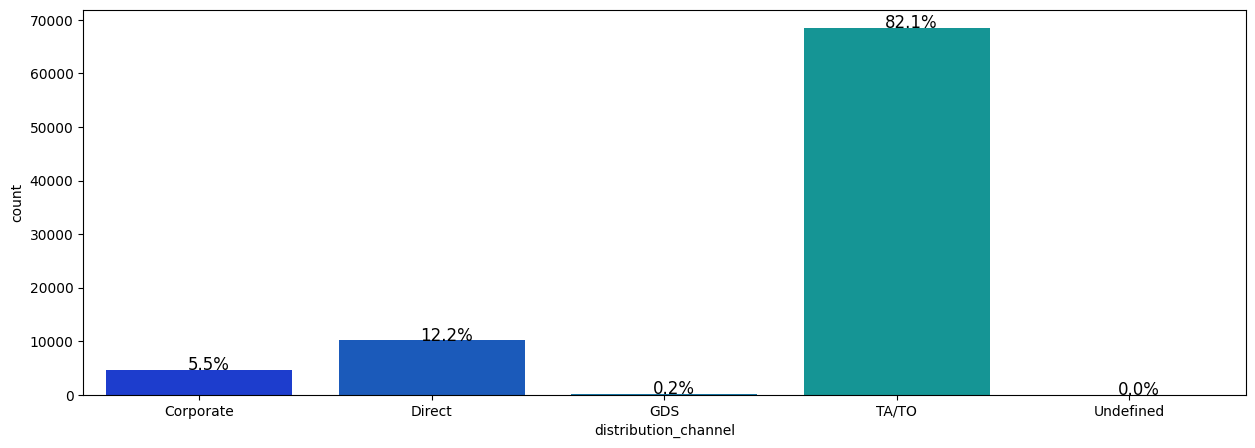

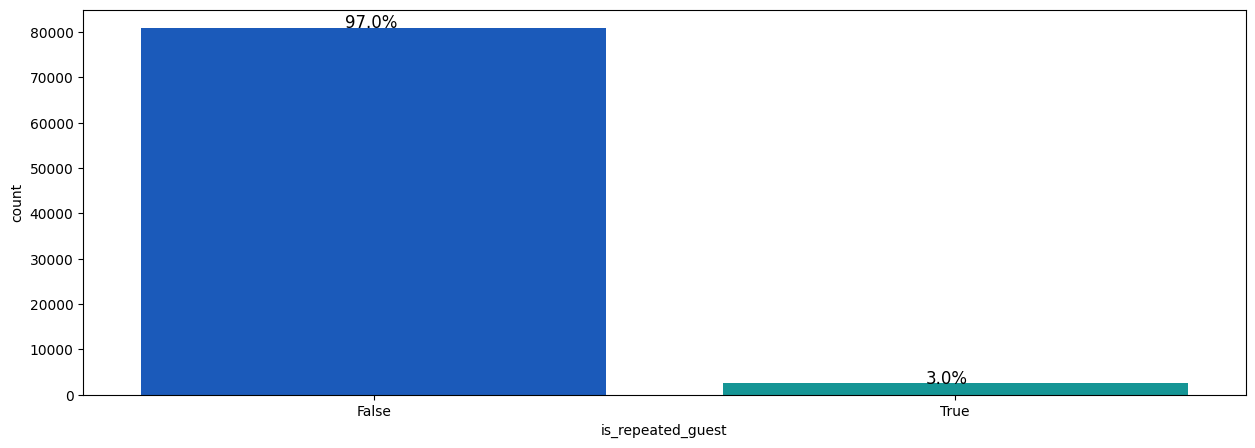

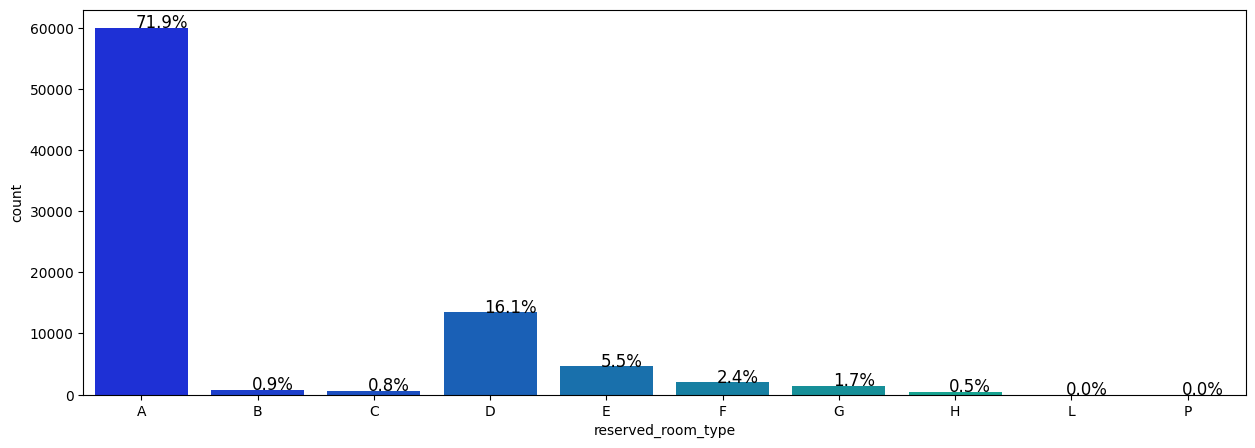

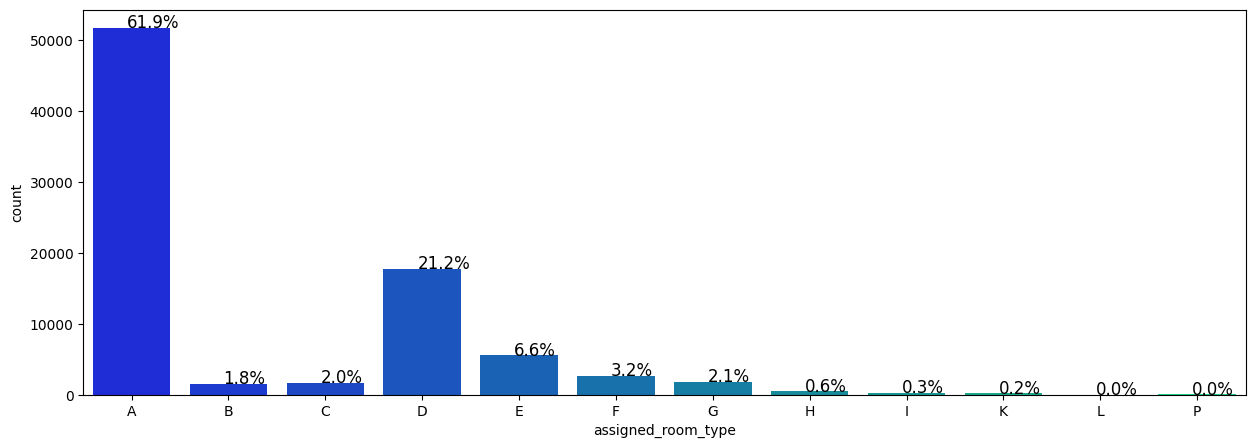

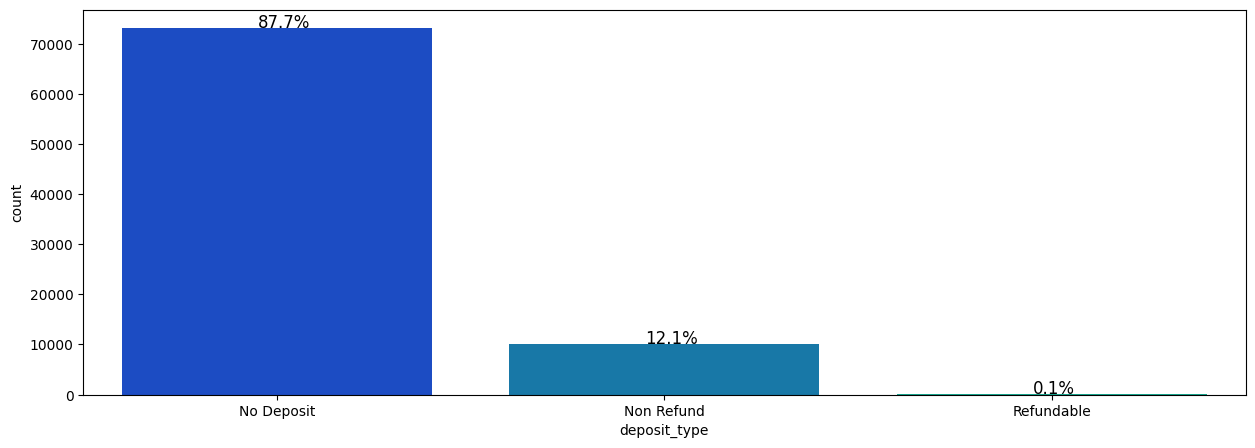

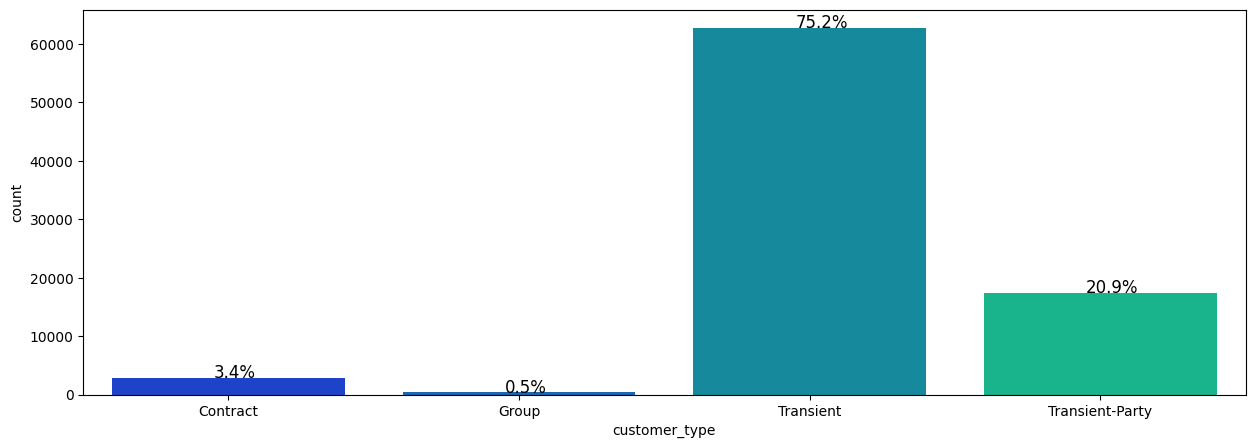

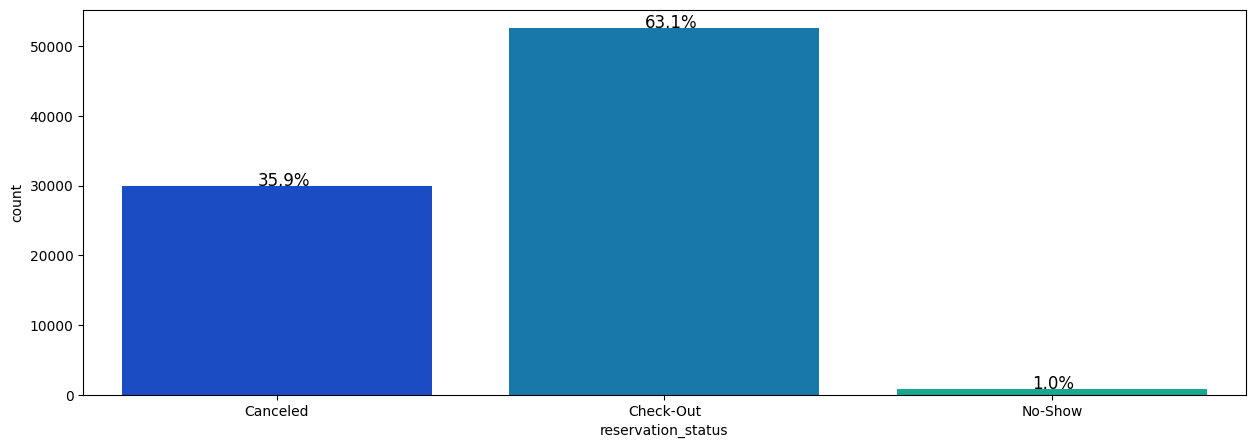

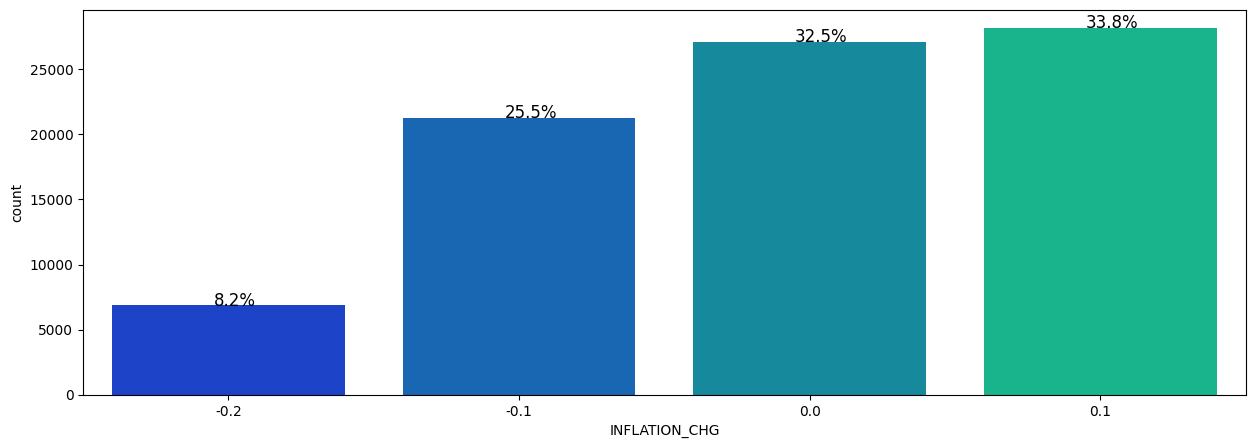

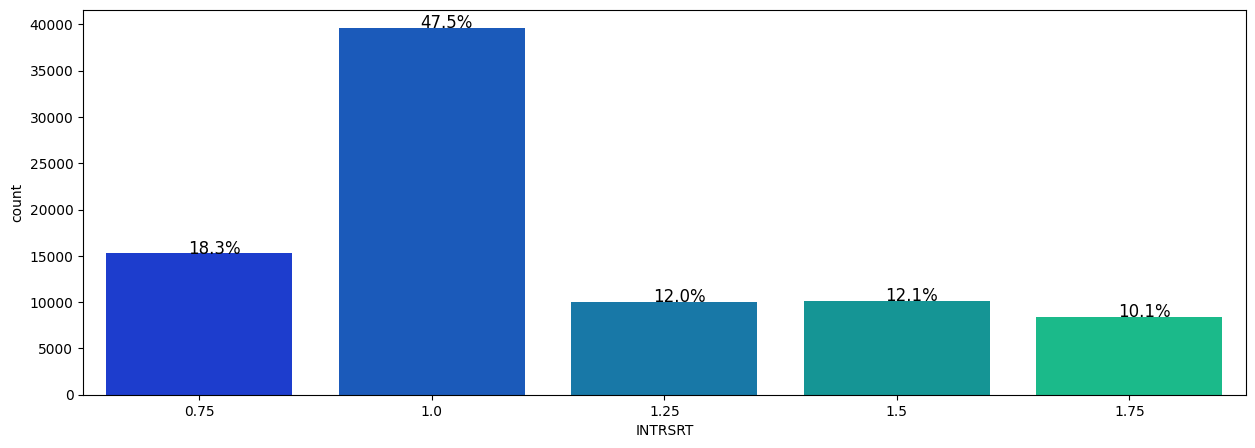

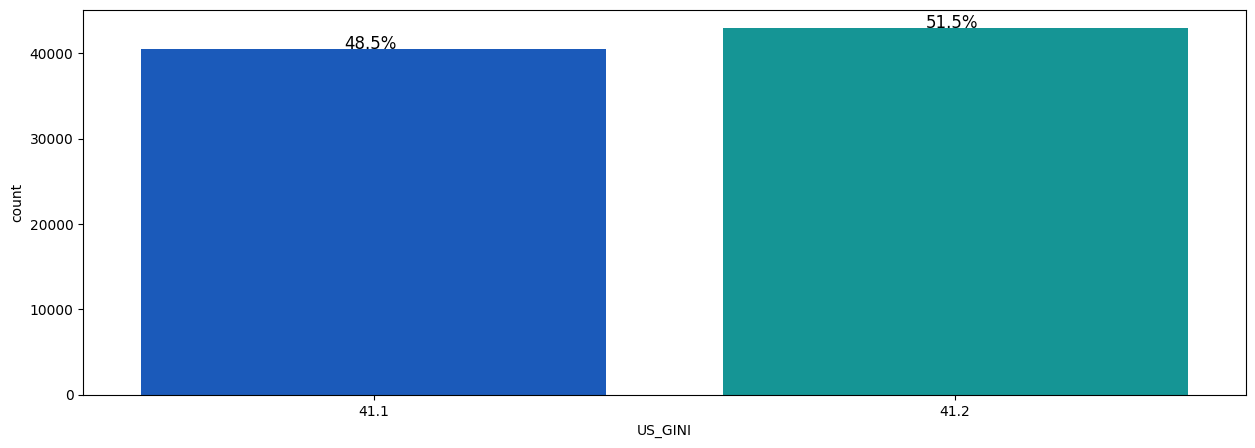

In [35]:
# Bar plots for categorical values
for i in ['hotel', 'babies','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type', 'reservation_status', 'INFLATION_CHG', 'INTRSRT', 'US_GINI']:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x = X_train[i],palette='winter')
    perc_on_bar(ax,X_train[i])
    plt.show()

In [36]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, y_train['is_canceled'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x, y_train['is_canceled'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

is_canceled         False   True    All
reservation_status                     
Canceled                0  29975  29975
Check-Out           52616      0  52616
No-Show                 0    855    855
All                 52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


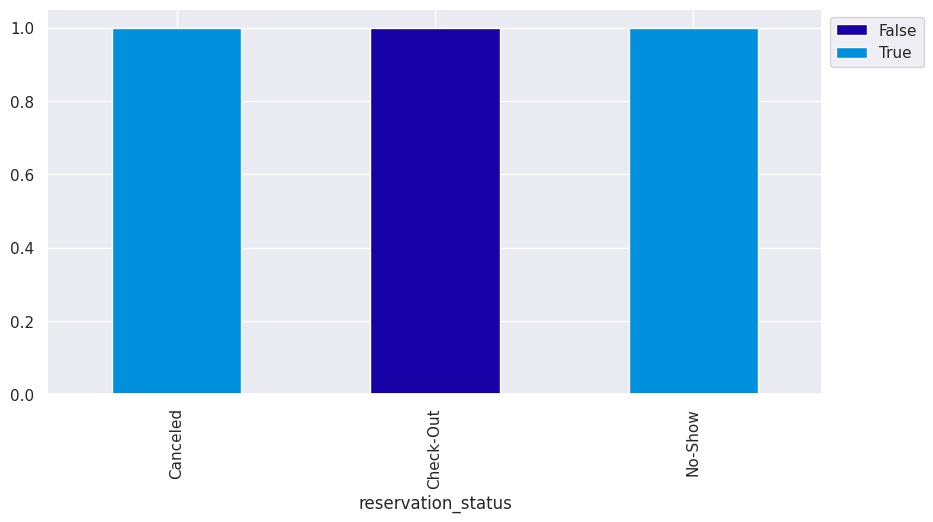

In [37]:
stacked_plot(hotelBook['reservation_status'])

is_canceled   False   True    All
hotel                            
City Hotel    32414  23095  55509
Resort Hotel  20202   7735  27937
All           52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


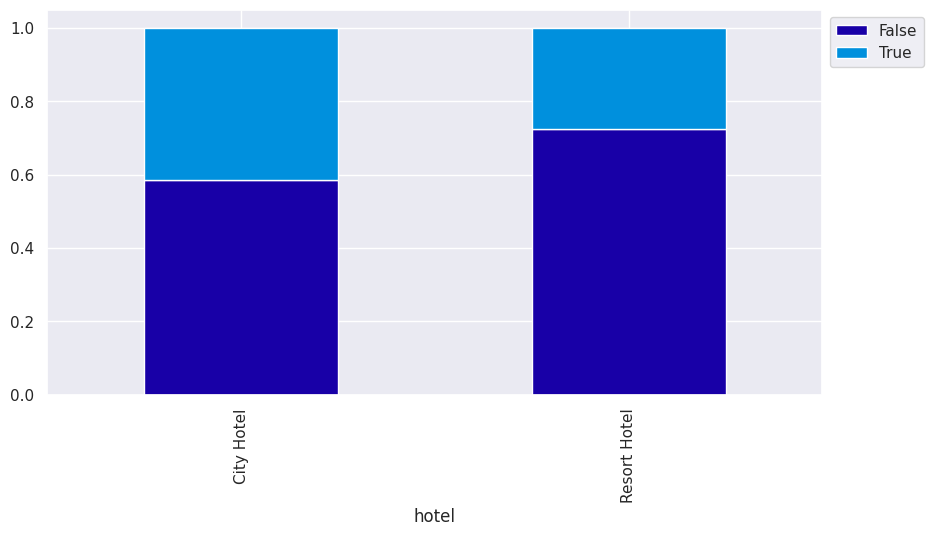

is_canceled  False   True    All
meal                            
BB           40402  23992  64394
FB             229    331    560
HB            6637   3504  10141
SC            4733   2791   7524
Undefined      615    212    827
All          52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


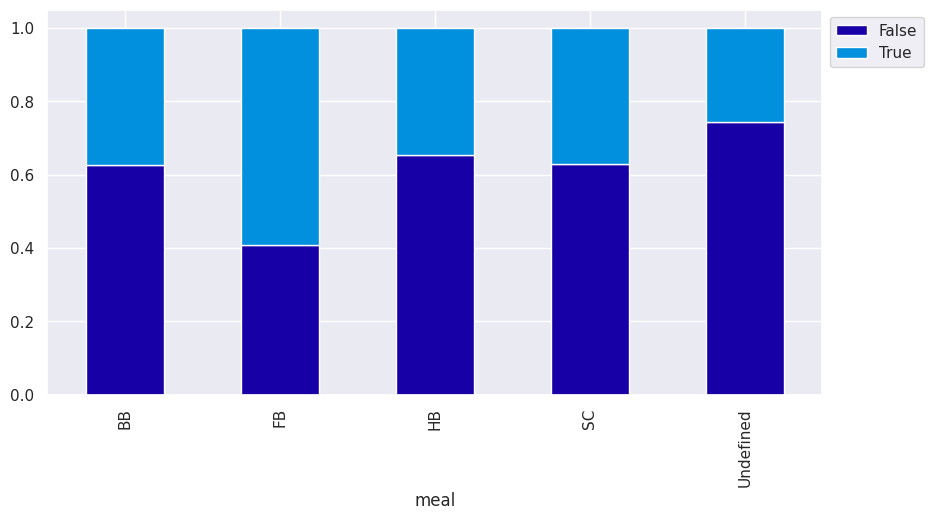

is_canceled     False   True    All
market_segment                     
Aviation          130     38    168
Complementary     432     65    497
Corporate        3012    652   3664
Direct           7442   1333   8775
Groups           5327   8283  13610
Offline TA/TO   11238   5818  17056
Online TA       25035  14640  39675
Undefined           0      1      1
All             52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


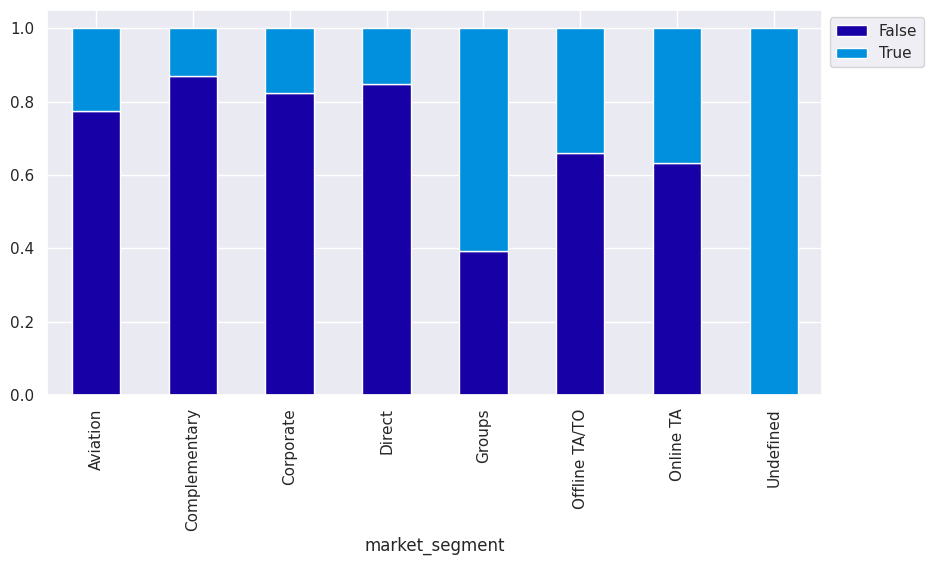

is_canceled           False   True    All
distribution_channel                     
Corporate              3617   1001   4618
Direct                 8399   1764  10163
GDS                     118     29    147
TA/TO                 40481  28034  68515
Undefined                 1      2      3
All                   52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


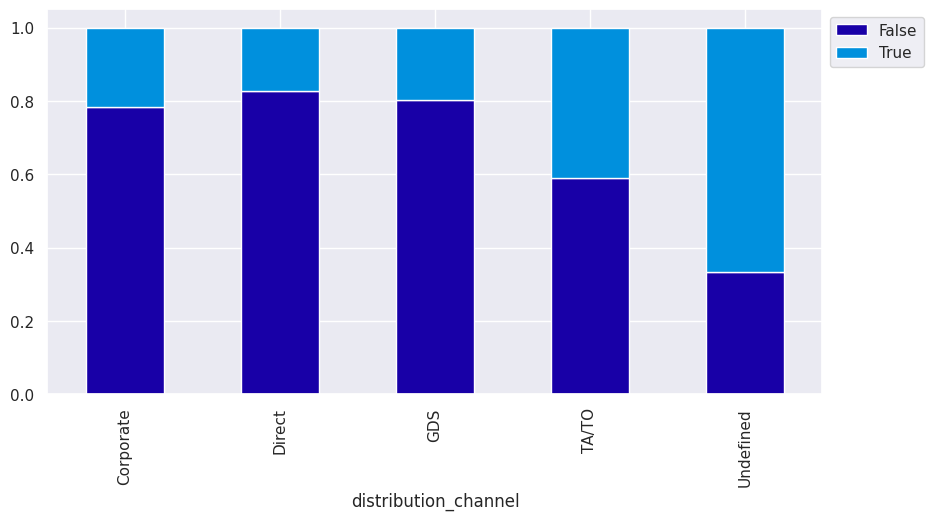

is_canceled        False   True    All
is_repeated_guest                     
False              50367  30575  80942
True                2249    255   2504
All                52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


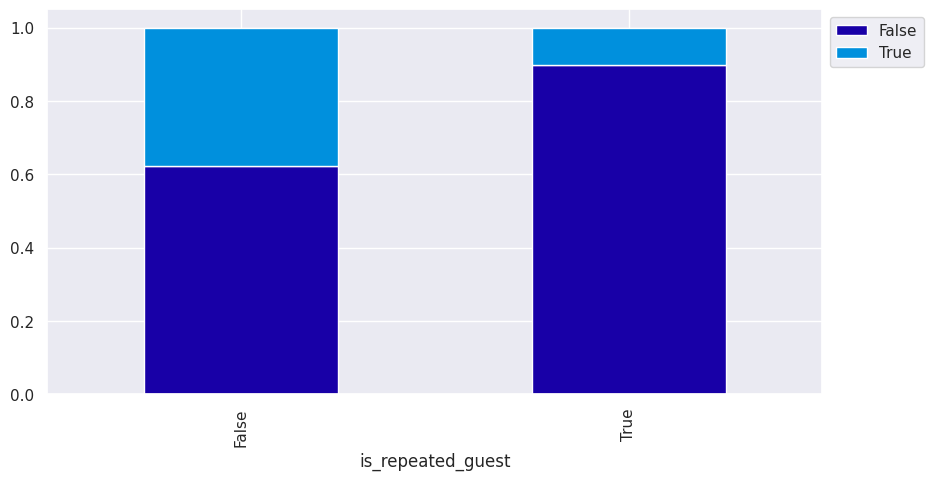

is_canceled         False   True    All
reserved_room_type                     
A                   36580  23430  60010
B                     535    247    782
C                     438    217    655
D                    9210   4236  13446
E                    3257   1363   4620
F                    1428    603   2031
G                     915    543   1458
H                     250    177    427
L                       3      2      5
P                       0     12     12
All                 52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


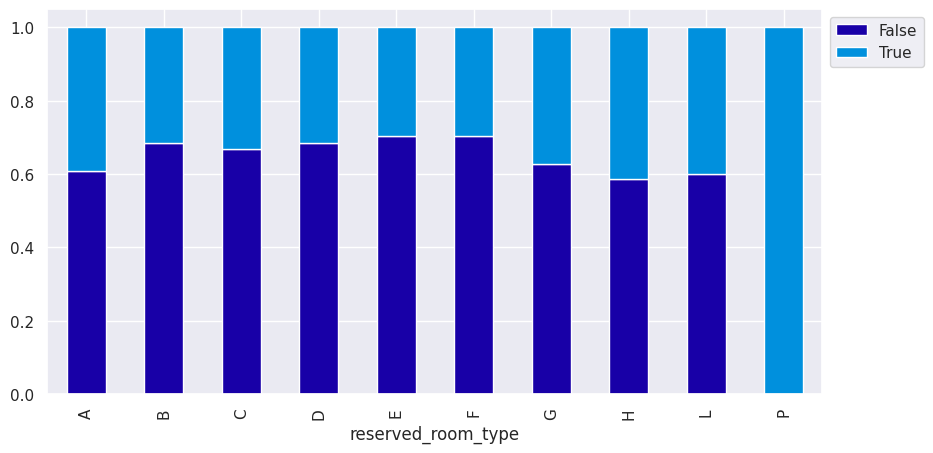

is_canceled   False   True    All
deposit_type                     
No Deposit    52462  20749  73211
Non Refund       64  10058  10122
Refundable       90     23    113
All           52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


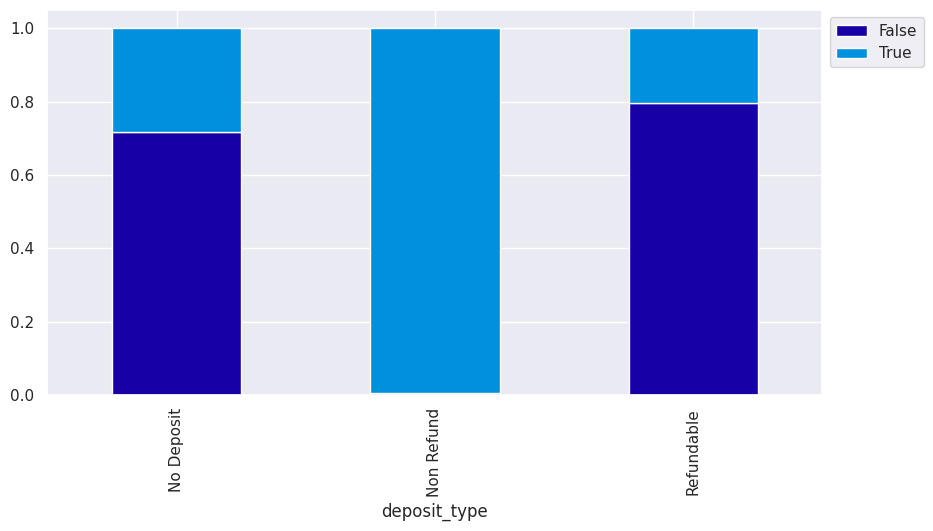

is_canceled      False   True    All
customer_type                       
Contract          1983    883   2866
Group              369     36    405
Transient        37142  25582  62724
Transient-Party  13122   4329  17451
All              52616  30830  83446
------------------------------------------------------------------------------------------------------------------------


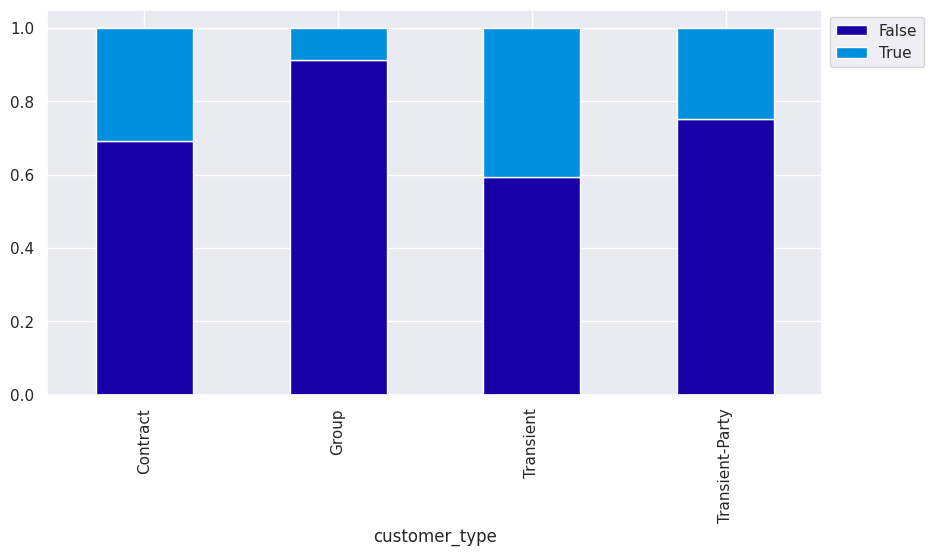

In [38]:
for i in ['hotel','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','deposit_type','customer_type']:
    stacked_plot(X_train[i])

## EDA

## Understanding Customer Patterns and Trends
1.   Stay_in_weekend_nishtg is Mostly 0, 1, 2.
2.   Adults count is Mostly 1, 2, 3. Can consider all others as outliers.
3.   Children count is Mostly 0, 1, 2. 92% values are 0. Convert float to integer. Consider all others as outliers.Drop the column.
4.   Babies count is Mostly 0. Column can be dropped.
5.   Meal_value FB less than 1% valuecount. More than 77% BB.
6.   In market_segment Complementary, Aviation and Undefined are outliers.
7.   88% of distriubution_channel is TA/TO. GDS, Undefined is less than 1%.
8.   Drop is_repeated_guest imbalanced column.
9.   94.5% previous_cancellations data is 0, highly imbalanced.Column can be dropped.
10.   97% of previous_bookings not canceled data is 0. Highly imbalanced.Drop the column.
11.   A and D are the most common values.Drop the column, as most guests change room type on check in and availability.
12.   Data leakage as assigned changes from reserved only on check in,Drop column: assigned_room_type.
13.   Majority value of days_in_waiting_list is 0. Drop the column.
14.   93% values in required_car_parking_spaces are 0, Drop the column.
15.   Reservation status Drop the column. Cannot be used due to risk of future leakage







In [39]:
X_train.drop(columns=['reservation_status', 'required_car_parking_spaces', 'days_in_waiting_list', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type'], inplace = True)
# Drop columns in training data: required_car_parking_spaces, days_in_waiting_list, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, assigned_room_type. Reflect the changes in test.


X_test.drop(columns=[ 'reservation_status', 'required_car_parking_spaces', 'days_in_waiting_list', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type'], inplace = True)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83446 entries, 11092 to 14853
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      83446 non-null  category
 1   lead_time                  83446 non-null  float64 
 2   stays_in_weekend_nights    83446 non-null  float64 
 3   stays_in_week_nights       83446 non-null  float64 
 4   adults                     83446 non-null  float64 
 5   meal                       83446 non-null  category
 6   market_segment             83446 non-null  category
 7   distribution_channel       83446 non-null  category
 8   booking_changes            83446 non-null  float64 
 9   deposit_type               83446 non-null  category
 10  agent                      83446 non-null  float64 
 11  customer_type              83446 non-null  category
 12  adr                        83446 non-null  float64 
 13  total_of_special_requests  

## Correlation between independent variables.

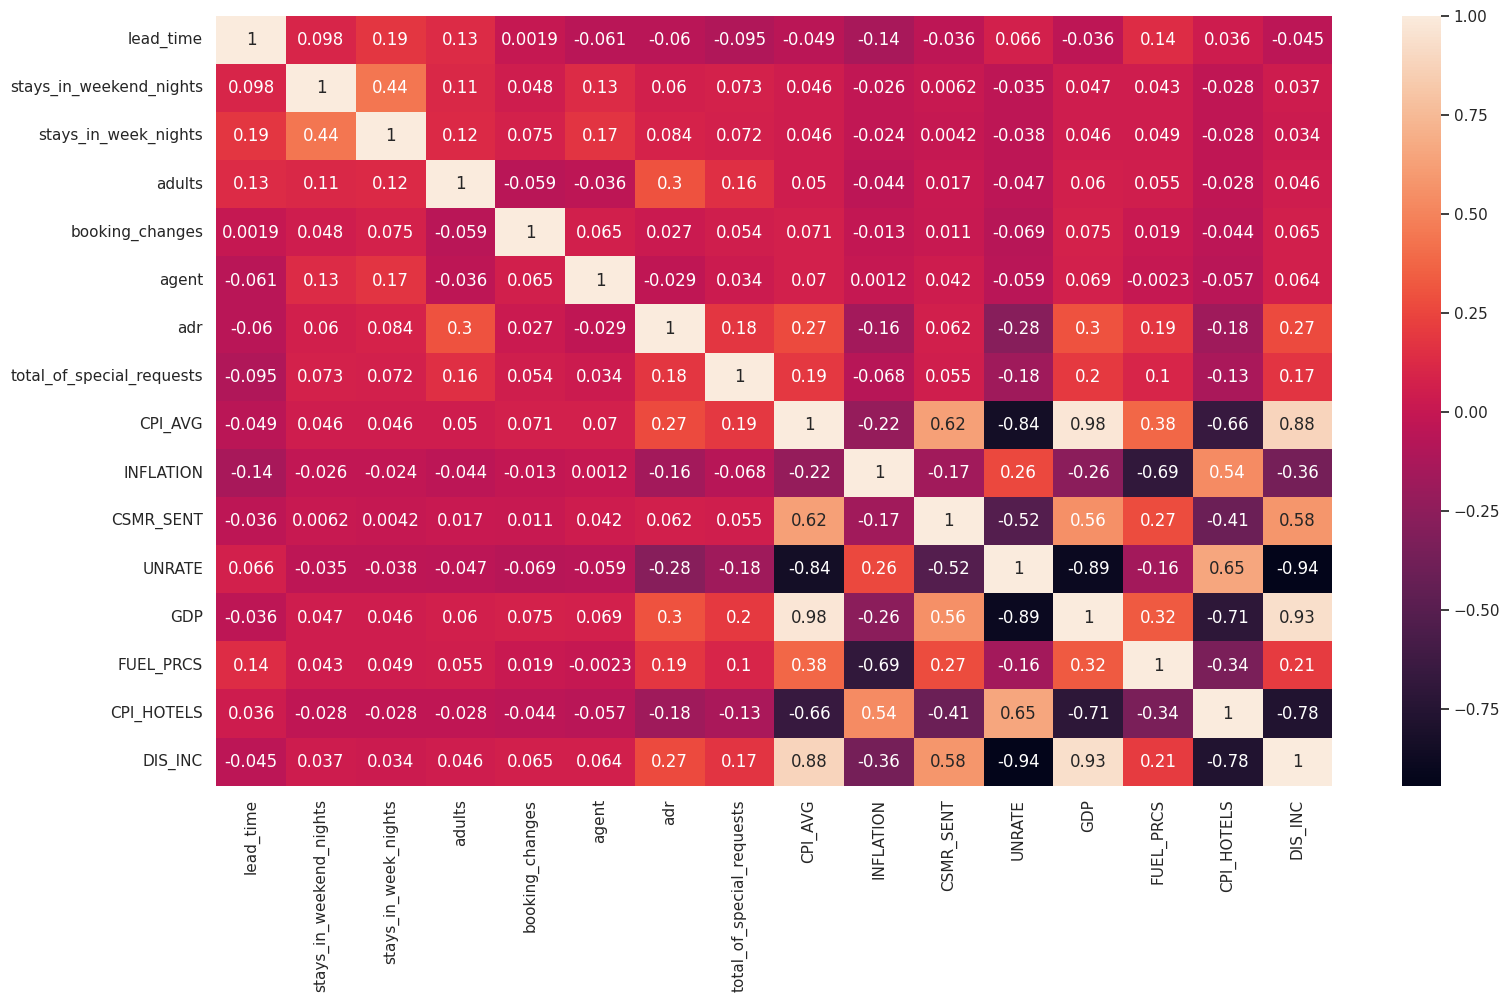

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

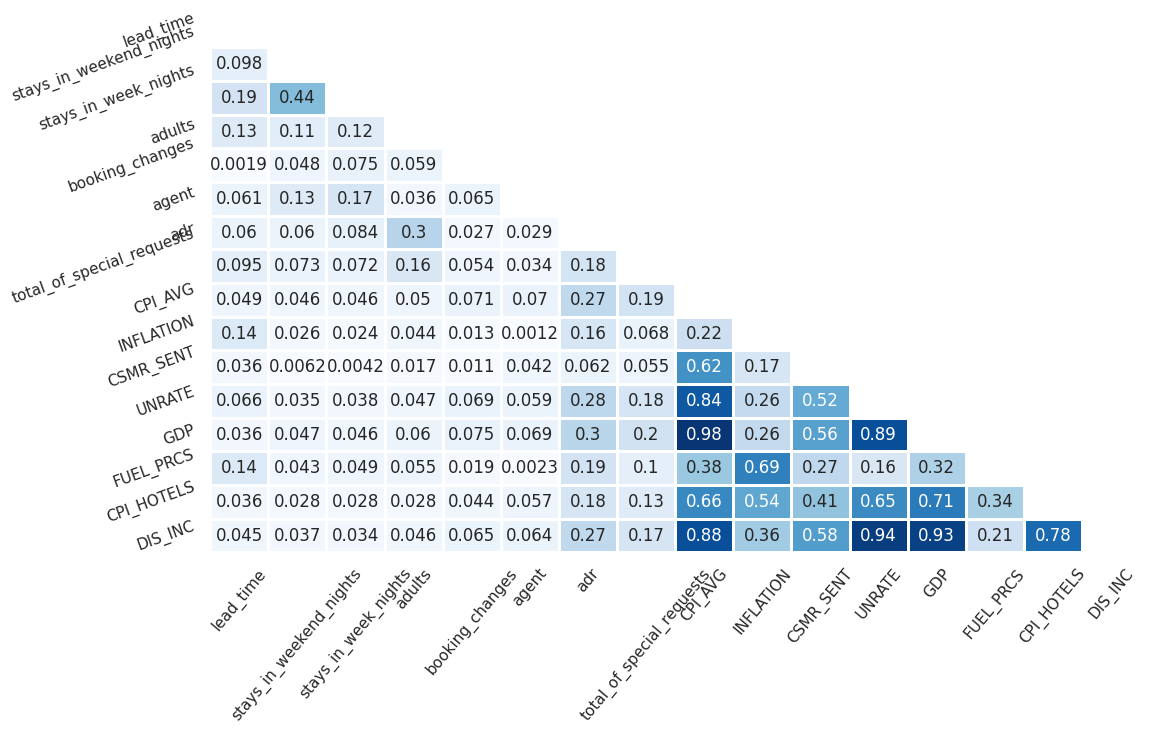

In [42]:
corr = abs(X_train.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,7))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Heatmap
plt.xticks(rotation = 50)   # Aesthetics
plt.yticks(rotation = 20)   # Aesthetics
plt.show()

Dropping highly correlated variables.

In [43]:
# CPI_AVG has high correlation with UNRATE(-0.84), GDP(0.98), DIS_INC(0.88), hence these variables can be dropped, while keeping CPI_AVG.

X_train.drop(columns=['UNRATE', 'GDP', 'DIS_INC'], inplace = True)
# Drop columns in training data: required_car_parking_spaces, days_in_waiting_list, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, assigned_room_type. Reflect the changes in test.


X_test.drop(columns=['UNRATE', 'GDP', 'DIS_INC'], inplace = True)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83446 entries, 11092 to 14853
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      83446 non-null  category
 1   lead_time                  83446 non-null  float64 
 2   stays_in_weekend_nights    83446 non-null  float64 
 3   stays_in_week_nights       83446 non-null  float64 
 4   adults                     83446 non-null  float64 
 5   meal                       83446 non-null  category
 6   market_segment             83446 non-null  category
 7   distribution_channel       83446 non-null  category
 8   booking_changes            83446 non-null  float64 
 9   deposit_type               83446 non-null  category
 10  agent                      83446 non-null  float64 
 11  customer_type              83446 non-null  category
 12  adr                        83446 non-null  float64 
 13  total_of_special_requests  

Split categorical variables into dummy variables.

In [45]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(83446, 42) (35763, 42)


## Evaluating models between Logistic Regression, Decision Tree, Random Forest, AdaBoost, XGBoost using pipeline, with scoring criteria as precision and training time.

In [46]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DT",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("dt", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)


In [47]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

In [48]:
# Loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    t0 = time.time()
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    print("Training time", time.time()-t0)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    print("\n")

Training time 7.366943836212158
LR: 83.98913952703616


Training time 4.165122032165527
DT: 78.32657347497405


Training time 57.22038173675537
RF: 90.57950224358147


Training time 19.953858137130737
ADB: 83.89753951564899


Training time 6.235481023788452
XGB: 89.60170775131277




Best Precision is obtained with Random Forest but is the slowest.

Second best precision is obtained with XGBoost, training time is much less than Random Forest.

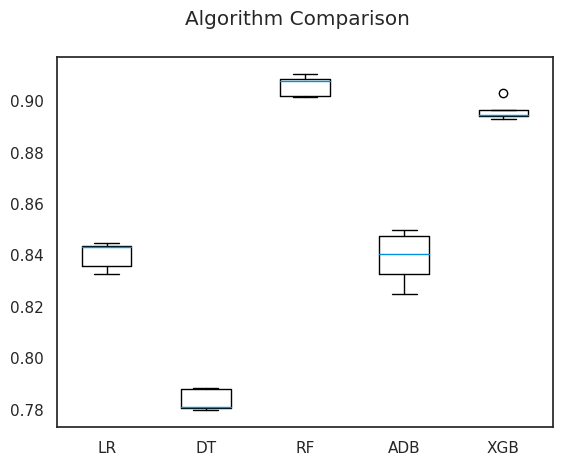

In [49]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Plotted Model score vs Precision.

We choose to proceed with Random Forest and XGBoost Algorithm, and use hyperparameter tuning to improve performance of the model.

In [50]:
## Function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

* We can see that Random Forest Algorithm is giving the best precision score followed by XGBoost Algorithm.
* Random Forest performance is consistent, XGBoost performance is mostly consistent with just one outlier.
* We will tune best two models i.e. random forest and xgboost and see if the performance improves.

Random Forest

In [51]:
# Parameter grid to pass for Random forest Algorithm for tuning.
param_grid = {
    'n_estimators': [10,25, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Building a **Random Forest Model** with hyperparameter tuning using **RandomizedSearch CV**

In [52]:
%%time
# Search for best paramters in the range for RandomForestClassifier

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)
CPU times: user 2min, sys: 180 ms, total: 2min 1s
Wall time: 2min 1s


In [53]:
%%time
rf_model = RandomForestClassifier( max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25, class_weight='balanced') # Model with best parameters chosen
rf_model.fit(X_train, y_train) # Training of model

CPU times: user 5.33 s, sys: 17.9 ms, total: 5.34 s
Wall time: 5.38 s


RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=None,
                       max_leaf_nodes=9, n_estimators=25)

In [54]:
# Predict the mode
y_predict = rf_model.predict(X_test)

print("Training accuracy",rf_model.score(X_train,y_train))  #  training accuracy for data in xtrain
print()
print("Testing accuracy",rf_model.score(X_test, y_test))   # testing accuracy for data in xtest

Training accuracy 0.7992354336936461

Testing accuracy 0.7993736543354863


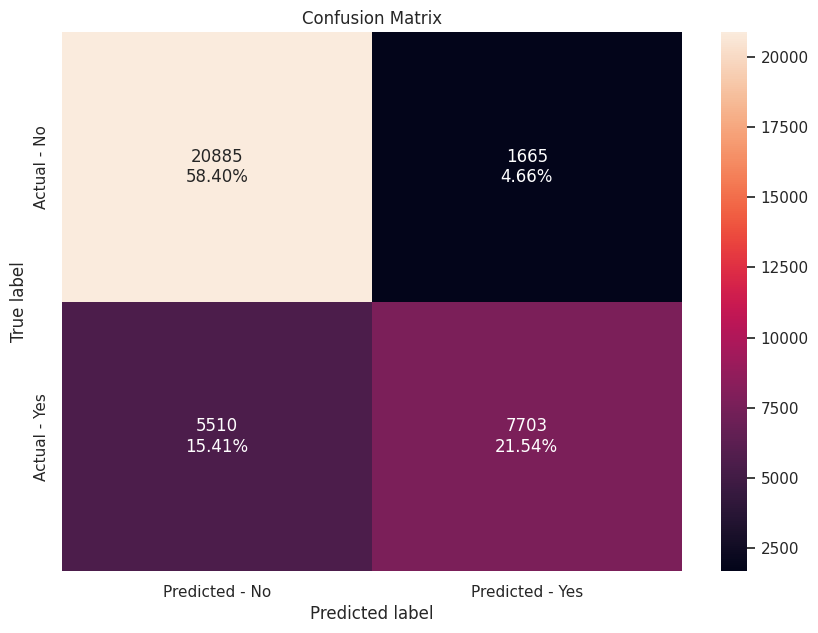

In [55]:
# Plot confusion matrix for  Random Forest Algorithm

draw_cm(y_test,y_predict)

In [56]:
# Precision for Ranfom Forest

precision_score(y_test,y_predict)

0.822267292912041

In [67]:
rf_model.feature_importances_

array([0.12710871, 0.        , 0.        , 0.        , 0.01398252,
       0.00650224, 0.        , 0.13820041, 0.00077796, 0.        ,
       0.        , 0.05065059, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10608235, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.55580173,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00089349, 0.        ])

Building a **XGBoost Model** with hyperparameter tuning using **RandomizedSearch CV**

In [57]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [58]:
estimate = float( sum(y_train.values == 0) / sum(y_train.values == 1))
print('Estimate: %.3f' % estimate)

Estimate: 1.707


In [59]:
%%time
# Search for best paramters in the range for RandomForestClassifier
xgb_search = RandomizedSearchCV(XGBClassifier(),
                                   param_grid)
xgb_search.fit(X_train, y_train)
print(xgb_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
CPU times: user 2min 15s, sys: 527 ms, total: 2min 15s
Wall time: 1min 17s


In [60]:
%%time

xgb_model = XGBClassifier(max_depth=9, min_child_weight=5, scale_pos_weight = estimate) # Model with best parameters chosen
xgb_model.fit(X_train, y_train) # Training the model

CPU times: user 4.83 s, sys: 19.4 ms, total: 4.84 s
Wall time: 2.52 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# predict the mode
y_predict = xgb_model.predict(X_test)

print("Training accuracy",xgb_model.score(X_train,y_train))  #  training accuracy for data in xtrain
print()
print("Testing accuracy",xgb_model.score(X_test, y_test))   # testing accuracy for data in xtest

Training accuracy 0.9270666059487572

Testing accuracy 0.8789810698207645


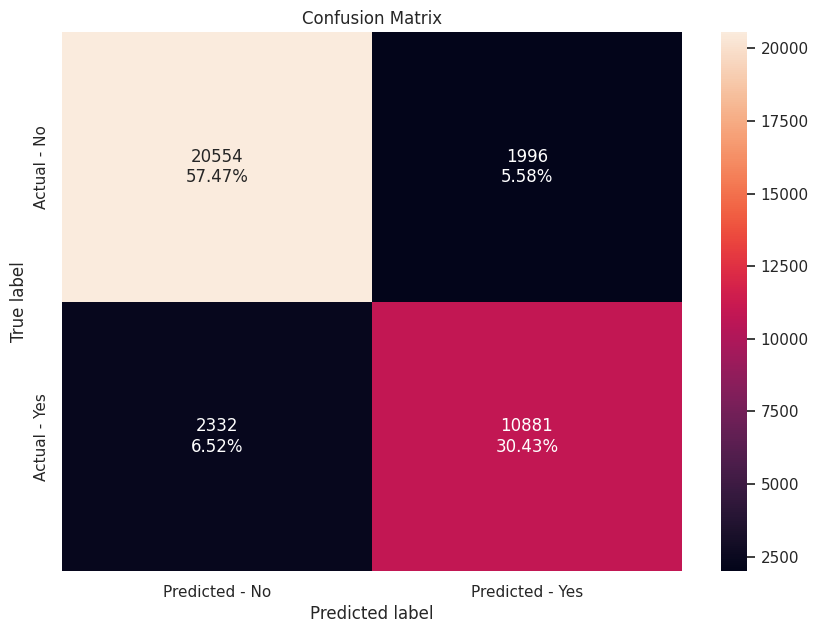

In [62]:
# Plot confusion matrix for XGBoost Algorithm-

draw_cm(y_test,y_predict)

In [63]:
# Precision score for XGBoost

precision_score(y_test,y_predict)

0.8449949522404286

In [65]:
xgb_model.feature_importances_

array([0.00546078, 0.00227105, 0.00259224, 0.00267463, 0.00986523,
       0.00482716, 0.00326681, 0.01517916, 0.00612176, 0.00656612,
       0.00373454, 0.00679206, 0.00373673, 0.00485786, 0.00788948,
       0.00294009, 0.00350225, 0.00724199, 0.00171219, 0.00657551,
       0.00239332, 0.00421957, 0.00514172, 0.02941372, 0.        ,
       0.00229299, 0.00153984, 0.00405308, 0.        , 0.7476182 ,
       0.0012631 , 0.00210478, 0.00917959, 0.01163576, 0.00278222,
       0.00848373, 0.00435989, 0.00674905, 0.01154842, 0.0045259 ,
       0.0290996 , 0.00378793], dtype=float32)

In [66]:
X_train.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'booking_changes', 'agent', 'adr',
       'total_of_special_requests', 'CPI_AVG', 'INFLATION', 'CSMR_SENT',
       'FUEL_PRCS', 'CPI_HOTELS', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'INFLATION_CHG_-0.1',
       'INFLATION_CHG_0.0', 'INFLATION_CHG_0.1', 'INTRSRT_1.0', 'INTRSRT_1.25',
       'INTRSRT_1.5', 'INTRSRT_1.75', 'US_GINI_41.2'],
      dtype='object